## PROGRAM 11.1
Sample averages by treatment level

Data from Figures 11.1 and 11.2

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
A = np.array([1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0])
Y= np.array([200,150,220,110,50,180,90,170,170,30,70,110,80,50,10,20])

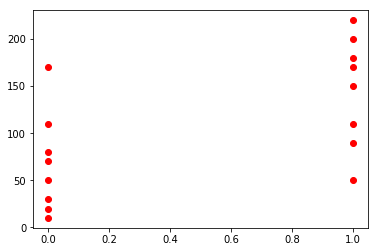

In [3]:
plt.plot(A, Y, 'ro')
plt.show()

In [4]:
pd.concat([pd.DataFrame(Y[A==1],columns=['1']).describe()\
           ,pd.DataFrame(Y[A==0],columns=['0']).describe()], axis=1)

,1,0
count,8.000000,8.000000
mean,146.250000,67.500000
std,58.294205,53.117121
min,50.000000,10.000000
25%,105.000000,27.500000
50%,160.000000,60.000000
75%,185.000000,87.500000
max,220.000000,170.000000


In [5]:
A2 = np.array([1,1,1,1,2,2,2,2,3,3,3,3,4,4,4,4])
Y2 = np.array([110,80,50,40,170,30,70,50,110,50,180,130,200,150,220,210])

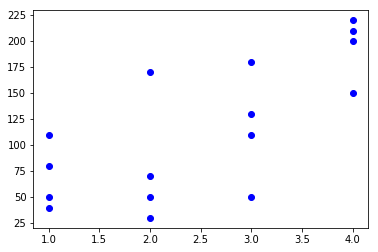

In [6]:
plt.plot(A2, Y2, 'bo')
plt.show()

In [7]:
frames = [pd.DataFrame(Y2[A2==1],columns=['1']).describe()\
          ,pd.DataFrame(Y2[A2==2],columns=['2']).describe()\
          , pd.DataFrame(Y2[A2==3],columns=['3']).describe()\
          ,pd.DataFrame(Y2[A2==4],columns=['4']).describe()]

pd.concat(frames, axis=1)

,1,2,3,4
count,4.000000,4.000000,4.000000,4.000000
mean,70.000000,80.000000,117.500000,195.000000
std,31.622777,62.182527,53.774219,31.091264
min,40.000000,30.000000,50.000000,150.000000
25%,47.500000,45.000000,95.000000,187.500000
50%,65.000000,60.000000,120.000000,205.000000
75%,87.500000,95.000000,142.500000,212.500000
max,110.000000,170.000000,180.000000,220.000000


## PROGRAM 11.2
2-parameter linear model

Data from Figures 11.3 and 11.1


In [8]:
A3 = np.array([3,11,17,23,29,37,41,53,67,79,83,97,60,71,15,45])
Y3 = np.array([21,54,33,101,85,65,157,120,111,200,140,220,230,217,11,190])

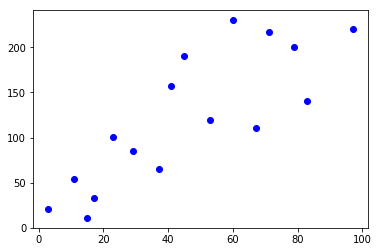

In [9]:
plt.plot(A3, Y3, 'bo')
plt.show()

In [10]:
import statsmodels.api as sm

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [11]:
model1 = sm.OLS(Y3, A3)
results1 = model1.fit()
print(results1.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     147.0
Date:                Fri, 02 Feb 2018   Prob (F-statistic):           3.76e-09
Time:                        03:22:17   Log-Likelihood:                -82.938
No. Observations:                  16   AIC:                             167.9
Df Residuals:                      15   BIC:                             168.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.5309      0.209     12.123      0.0

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [12]:
y2_pred = results1.predict()

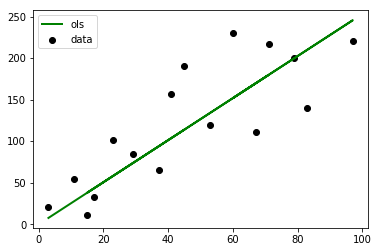

In [13]:
# Plot outputs
plt.scatter(A3, Y3,  color='black', label='data')
plt.plot(A3, y2_pred, color='green', linewidth=2, label='ols')
plt.legend(loc='best');

plt.show()

## PROGRAM 11.3

3-parameter linear model

Data from Figure 11.3


In [14]:
model1 = sm.OLS(Y3, A)
results1 = model1.fit()
print(results1.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     2.797
Date:                Fri, 02 Feb 2018   Prob (F-statistic):              0.115
Time:                        03:22:18   Log-Likelihood:                -100.60
No. Observations:                  16   AIC:                             203.2
Df Residuals:                      15   BIC:                             204.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            79.5000     47.532      1.673      0.1

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [15]:
y2_pred = results1.predict()

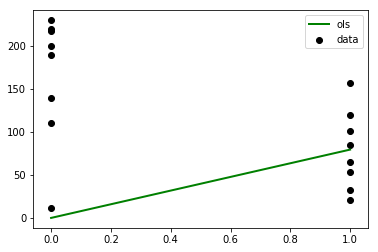

In [16]:
# Plot outputs
plt.scatter(A, Y3,  color='black', label='data')
plt.plot(A, y2_pred, color='green', linewidth=2, label='ols')
plt.legend(loc='best');

plt.show()

#####################################################
## PROGRAM 12.1

Descriptive statistics from NHEFS data (Table 12.1)
#####################################################

In [17]:
nhefs = pd.read_csv('nhefs.csv')
nhefs.set_index('seqn', inplace=True)
#nhefs.convert_objects(convert_numeric=True)
nhefs.head()

,qsmk,death,yrdth,sbp,dbp,sex,age,race,income,marital,...,birthcontrol,pregnancies,cholesterol,hightax82,price71,price82,tax71,tax82,price71_82,tax71_82
seqn,,,,,,,,,,,,,,,,,,,,,
233,0,0,NaN,175.0,96.0,0,42,1,19.0,2,...,2,NaN,197.0,0.0,2.183594,1.739990,1.102295,0.461975,0.443787,0.640381
235,0,0,NaN,123.0,80.0,0,36,0,18.0,2,...,2,NaN,301.0,0.0,2.346680,1.797363,1.364990,0.571899,0.549316,0.792969
244,0,0,NaN,115.0,75.0,1,56,1,15.0,3,...,0,2.0,157.0,0.0,1.569580,1.513428,0.551270,0.230988,0.056198,0.320251
245,0,1,85.0,148.0,78.0,0,68,1,15.0,3,...,2,NaN,174.0,0.0,1.506592,1.451904,0.524902,0.219971,0.054794,0.304993
252,0,0,NaN,118.0,77.0,0,40,0,18.0,2,...,2,NaN,216.0,0.0,2.346680,1.797363,1.364990,0.571899,0.549316,0.792969


In [18]:
nhefs['cens'] = nhefs['wt82'].isnull().apply(lambda x: int(x))

In [19]:
nhefs['older'] = ((nhefs['age'] > 50) & nhefs['age'].notnull()).apply(int)

In [20]:
nhefs['education_code'] = nhefs['school'].apply(lambda s: 1 if s in range(0,9)\
                                                 else (2 if s in range(9,12)\
                                                 else (3 if s == 12 else (4 if s in range(13,16)\
                                                 else (5 if s >= 16 else 6)))))

In [21]:
nhefs['education'] =\
nhefs['education_code'].apply(lambda s: '1. 8th grade or less' if s==1\
                               else ('2. HS dropout' if s==2\
                               else ('3. HS'  if s==3\
                               else ('4. College dropout' if s==4\
                               else ('5. College or more' if s==5\
                               else ('Unknown' if s==6       
                                        else s))))))


In [22]:
nhefs.head()

,qsmk,death,yrdth,sbp,dbp,sex,age,race,income,marital,...,price71,price82,tax71,tax82,price71_82,tax71_82,cens,older,education_code,education
seqn,,,,,,,,,,,,,,,,,,,,,
233,0,0,NaN,175.0,96.0,0,42,1,19.0,2,...,2.183594,1.739990,1.102295,0.461975,0.443787,0.640381,0,0,1,1. 8th grade or less
235,0,0,NaN,123.0,80.0,0,36,0,18.0,2,...,2.346680,1.797363,1.364990,0.571899,0.549316,0.792969,0,0,2,2. HS dropout
244,0,0,NaN,115.0,75.0,1,56,1,15.0,3,...,1.569580,1.513428,0.551270,0.230988,0.056198,0.320251,0,1,2,2. HS dropout
245,0,1,85.0,148.0,78.0,0,68,1,15.0,3,...,1.506592,1.451904,0.524902,0.219971,0.054794,0.304993,0,1,1,1. 8th grade or less
252,0,0,NaN,118.0,77.0,0,40,0,18.0,2,...,2.346680,1.797363,1.364990,0.571899,0.549316,0.792969,0,0,2,2. HS dropout


In [23]:
# Analysis restricted to N=1566 
# with non-missing values in the following covariates
nhefs_original = nhefs # Original data saved for later use

In [24]:
nhefs.insert(0, 'id', range(1, len(nhefs)+1))

In [25]:
nhefs2 = nhefs[['id', 'qsmk', 'sex', 'race', 'age', 'school',\
 'smokeintensity', 'smokeyrs', 'exercise', \
 'active', 'wt71', 'wt82']].reset_index()
nhefs2.drop(['seqn'], axis=1)
nhefs2.set_index('id', inplace=True)

In [26]:
nhefs2.head()

,seqn,qsmk,sex,race,age,school,smokeintensity,smokeyrs,exercise,active,wt71,wt82
id,,,,,,,,,,,,
1,233,0,0,1,42,7.0,30,29,2,0,79.04,68.946040
2,235,0,0,0,36,9.0,20,24,0,0,58.63,61.234970
3,244,0,1,1,56,11.0,20,26,2,0,56.81,66.224486
4,245,0,0,1,68,5.0,3,53,2,1,59.42,64.410117
5,252,0,0,0,40,11.0,20,19,1,1,87.09,92.079251


In [27]:
print(nhefs2.shape)
nhefs2.dropna(inplace=True)
print(nhefs2.shape)

(1746, 12)
(1566, 12)


In [28]:
nhefs2.index

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            1735, 1736, 1737, 1738, 1739, 1740, 1741, 1742, 1744, 1746],
           dtype='int64', name='id', length=1566)

In [29]:
nhefs = nhefs.loc[nhefs2['seqn']]
nhefs['id'] = nhefs2.index
del nhefs2

In [30]:
nhefs.head()

,id,qsmk,death,yrdth,sbp,dbp,sex,age,race,income,...,price71,price82,tax71,tax82,price71_82,tax71_82,cens,older,education_code,education
seqn,,,,,,,,,,,,,,,,,,,,,
233,1,0,0,NaN,175.0,96.0,0,42,1,19.0,...,2.183594,1.739990,1.102295,0.461975,0.443787,0.640381,0,0,1,1. 8th grade or less
235,2,0,0,NaN,123.0,80.0,0,36,0,18.0,...,2.346680,1.797363,1.364990,0.571899,0.549316,0.792969,0,0,2,2. HS dropout
244,3,0,0,NaN,115.0,75.0,1,56,1,15.0,...,1.569580,1.513428,0.551270,0.230988,0.056198,0.320251,0,1,2,2. HS dropout
245,4,0,1,85.0,148.0,78.0,0,68,1,15.0,...,1.506592,1.451904,0.524902,0.219971,0.054794,0.304993,0,1,1,1. 8th grade or less
252,5,0,0,NaN,118.0,77.0,0,40,0,18.0,...,2.346680,1.797363,1.364990,0.571899,0.549316,0.792969,0,0,2,2. HS dropout


In [31]:
# mean weight change in those with and without smoking cessation
nhefs['wt82_71'][(nhefs['cens'] == 0) & (nhefs['qsmk'] == 0)].describe()

count    1163.000000
mean        1.984498
std         7.449076
min       -41.280470
25%        -1.810712
50%         2.151084
75%         6.119200
max        48.538386
Name: wt82_71, dtype: float64

In [32]:
nhefs['wt82_71'][(nhefs['cens'] == 0) & (nhefs['qsmk'] == 1)].describe()

count    403.000000
mean       4.525079
std        8.748261
min      -22.230470
25%       -0.170360
50%        3.971582
75%        9.694779
max       47.511303
Name: wt82_71, dtype: float64

In [33]:
import statsmodels.formula.api as smf

In [34]:
formula = 'wt82_71 ~ qsmk'
dta = nhefs[nhefs['cens'] == 0].copy()


In [35]:
mod2 = smf.glm(formula=formula, data=dta).fit()
mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                wt82_71   No. Observations:                 1566
Model:                            GLM   Df Residuals:                     1564
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                   60.8975700556
Method:                          IRLS   Log-Likelihood:                -5438.6
Date:                Fri, 02 Feb 2018   Deviance:                       95244.
Time:                        03:22:20   Pearson chi2:                 9.52e+04
No. Iterations:                     2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9845      0.229      8.672      0.000       1.536       2.433
qsmk           2.5406      0.451      5.632      0.000       1.656       3.425
==============================================================================
"""

In [36]:
# restricting data for uncensored
nhefs0 = nhefs[nhefs['cens'] == 0].copy()

In [37]:
# baseline characteristics
years1 = nhefs0['age'][nhefs0['qsmk'] == 1].mean()
years0 = nhefs0['age'][nhefs0['qsmk'] == 0].mean()
male1 = 100*(nhefs0['sex'][nhefs0['qsmk'] == 1]==0).mean()
male0 = 100*(nhefs0['sex'][nhefs0['qsmk'] == 0]==0).mean()
white1 = 100*(nhefs0['race'][nhefs0['qsmk'] == 1]==0).mean()
white0 = 100*(nhefs0['race'][nhefs0['qsmk'] == 0]==0).mean()
university1 = 100*(nhefs0['education_code'][nhefs0['qsmk'] == 1]==5).mean()
university0 = 100*(nhefs0['education_code'][nhefs0['qsmk'] == 0]==5).mean()
kg1 = (nhefs0['wt71'][nhefs0['qsmk'] == 1]).mean()
kg0 = (nhefs0['wt71'][nhefs0['qsmk'] == 0]).mean()
cigs1 = (nhefs0['smokeintensity'][nhefs0['qsmk'] == 1]).mean()
cigs0 = (nhefs0['smokeintensity'][nhefs0['qsmk'] == 0]).mean()
smoke1 = (nhefs0['smokeyrs'][nhefs0['qsmk'] == 1]).mean()
smoke0 = (nhefs0['smokeyrs'][nhefs0['qsmk'] == 0]).mean()
noexer1 = 100*(nhefs0['exercise'][nhefs0['qsmk'] == 1]==2).mean()
noexer0 = 100*(nhefs0['exercise'][nhefs0['qsmk'] == 0]==2).mean()
inactive1 = 100*(nhefs0['active'][nhefs0['qsmk'] == 1]==2).mean()
inactive0 = 100*(nhefs0['active'][nhefs0['qsmk'] == 0]==2).mean()

In [38]:
c = np.array(['age, years', 'men, %', 'white, %',\
      'university, %', 'weight, kg', \
      'Chigarettes/day', 'year smoking', \
      'little/no exercise, %', 'inactive daily life, %'])
m = np.array([years1, years0, male1, male0, white1, white0,\
     university1, university0, kg1, kg0,\
     cigs1, cigs0, smoke1, smoke0, \
     noexer1, noexer0, inactive1, inactive0])
m = m.reshape((int(len(m)/2),2), order='C').round(1)
baseline_char = pd.DataFrame(m,\
                             columns=['Smoking cessation (A=1)','No smoking cessation (A=0)'])
baseline_char['baseline.char'] = c
baseline_char.set_index('baseline.char', inplace=True)
baseline_char

,Smoking cessation (A=1),No smoking cessation (A=0)
baseline.char,,
"age, years",46.2,42.8
"men, %",54.6,46.6
"white, %",91.1,85.4
"university, %",15.4,9.9
"weight, kg",72.4,70.3
Chigarettes/day,18.6,21.2
year smoking,26.0,24.1
"little/no exercise, %",40.7,37.9
"inactive daily life, %",11.2,8.9


#####################################################
## PROGRAM 12.2
 Estimating IP weights
    
Data from NHEFS
#####################################################

In [39]:
dta = nhefs0.copy()

In [40]:
formula  = 'qsmk ~ C(sex) + C(race) + age + np.square(age) + C(education_code) + smokeintensity + ' 
formula += 'np.square(smokeintensity) + smokeyrs + np.square(smokeyrs) + C(exercise) + C(active) + '
formula += 'wt71 + np.square(wt71)'
formula

'qsmk ~ C(sex) + C(race) + age + np.square(age) + C(education_code) + smokeintensity + np.square(smokeintensity) + smokeyrs + np.square(smokeyrs) + C(exercise) + C(active) + wt71 + np.square(wt71)'

Estimation of ip weights via a logistic model

In [41]:
mod2 = smf.glm(formula=formula, family=sm.families.Binomial(), data=dta).fit()
mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   qsmk   No. Observations:                 1566
Model:                            GLM   Df Residuals:                     1547
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -838.45
Date:                Fri, 02 Feb 2018   Deviance:                       1676.9
Time:                        03:22:21   Pearson chi2:                 1.56e+03
No. Iterations:                     4                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -2.2425      1.381     -1.624      0.104      -4.949       0.464
C(sex)[T.1]                  -0.5275      0.154     -3.424      0.001      -0.829      -0.226
C(race)[T.1]                 -0.8393      0.210     -3.995      0.000      -1.251      -0.428
C(education_code)[T.2]       -0.0288      0.198     -0.145      0.885      -0.418       0.360
C(education_code)[T.3]        0.0864      0.178      0.485      0.627      -0.263       0.435
C(education_code)[T.4]        0.0636      0.273      0.233      0.816      -0.472       0.599
C(education_code)[T.5]        0.4760      0.226      2.104      0.035       0.033       0.919
C(exercise)[T.1]              0.3548      0.180      1.970      0.049       0.002       0.708
C(exercise)[T.2]              0.3957      0.187      2.113      0.035       0.029       0.763
C(active)[T.1]                0.0319      0.133      0.240      0.810      -0.229       0.292
C(active)[T.2]                0.1768      0.215      0.822      0.411      -0.245       0.598
age                           0.1212      0.051      2.364      0.018       0.021       0.222
np.square(age)               -0.0008      0.001     -1.538      0.124      -0.002       0.000
smokeintensity               -0.0773      0.015     -5.067      0.000      -0.107      -0.047
np.square(smokeintensity)     0.0010      0.000      3.647      0.000       0.000       0.002
smokeyrs                     -0.0736      0.028     -2.650      0.008      -0.128      -0.019
np.square(smokeyrs)           0.0008      0.000      1.822      0.068   -6.37e-05       0.002
wt71                         -0.0152      0.026     -0.579      0.563      -0.067       0.036
np.square(wt71)               0.0001      0.000      0.829      0.407      -0.000       0.000
=============================================================================================
"""

In [42]:
nhefs0['w'] = mod2.predict() 

nhefs0['w'] = list(map(lambda q: 1/q[1] if q[0]==1 else 1/(1-q[1])\
             ,zip(nhefs0['qsmk'],nhefs0['w'])))
nhefs0['w'].describe()

count    1566.000000
mean        1.996284
std         1.474787
min         1.053742
25%         1.229623
50%         1.373169
75%         1.989869
max        16.700094
Name: w, dtype: float64

In [43]:
formula1  = 'wt82_71 ~ qsmk'
dta1 = nhefs0.copy()

In [44]:
#cov = sm.cov_struct.Independence()
#cov = sm.cov_struct.Autoregressive()
#cov = sm.cov_struct.Exchangeable()
#fam = sm.families.Binomial()

model = sm.GEE.from_formula(formula1,data=dta1,weights=dta1['w'], groups='wt82_71')
result = model.fit()
print(result.summary())

                               GEE Regression Results                              
Dep. Variable:                     wt82_71   No. Observations:                 1566
Model:                                 GEE   No. clusters:                     1510
Method:                        Generalized   Min. cluster size:                   1
                      Estimating Equations   Max. cluster size:                   3
Family:                           Gaussian   Mean cluster size:                 1.0
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Fri, 02 Feb 2018   Scale:                          64.836
Covariance type:                    robust   Time:                         03:22:22
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7834      0.225      7.935      0.000       1.343       2.224
qsmk   

In [45]:
result.conf_int() #alpha=0.95

,0,1
Intercept,1.342910,2.223879
qsmk,2.481472,4.546613


In [46]:
formula2  = 'wt82_71 ~ qsmk + gid'
dta2 = nhefs0.copy()

dta2.reset_index(inplace=True)
gid = np.asarray(dta2['seqn'], int)
dta2.set_index('seqn',inplace=True)

Estimates from a GLM with cluster option

In [47]:

fit_kwds = dict(cov_kwds={'groups': gid})
mod2 = smf.glm(formula=formula2, data=dta2,\
               freq_weights=dta2['w'] )
result2 = mod2.fit(**fit_kwds)
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                wt82_71   No. Observations:                 1566
Model:                            GLM   Df Residuals:                     3123
Model Family:                Gaussian   Df Model:                            2
Link Function:               identity   Scale:                   65.0076483121
Method:                          IRLS   Log-Likelihood:                -9778.1
Date:                Fri, 02 Feb 2018   Deviance:                   2.0303e+05
Time:                        03:22:22   Pearson chi2:                 2.03e+05
No. Iterations:                     2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0158      0.380      2.673      0.008       0.271       1.761
qsmk           3.4470      0.288     11.951      0.000       2.882       4.012
gid         4.565e-05   1.92e-05      2.383      0.017     8.1e-06    8.32e-05
==============================================================================
"""

In [48]:
result2.conf_int()

,0,1
Intercept,0.271106,1.760572
qsmk,2.881733,4.012318
gid,0.000008,0.000083


In [49]:
result2.cov_params()

,Intercept,qsmk,gid
Intercept,0.144379,-4.240251e-02,-6.144029e-06
qsmk,-0.042403,8.318595e-02,5.218307e-08
gid,-0.000006,5.218307e-08,3.670293e-10


In [50]:
from statsmodels.base.covtype import get_robustcov_results

In [51]:
hc0_result = get_robustcov_results(result2._results,'HC0')
SE = np.sqrt(np.diag(hc0_result.cov_params()))
beta = result2.params
lcl = beta-1.96*SE 
ucl = beta+1.96*SE


In [52]:
ucl

Intercept    1.784763
qsmk         4.011888
gid          0.000085
dtype: float64

In [53]:
lcl

Intercept    0.246914
qsmk         2.882163
gid          0.000006
dtype: float64

In [54]:
np.c_[beta, lcl, ucl].round(decimals=2)[1]

array([ 3.45,  2.88,  4.01])

no association between sex and qsmk in pseudo-population

In [55]:
pd.crosstab(nhefs0['sex'], nhefs0['qsmk'], values=nhefs0['w'], aggfunc=sum, margins=True)

qsmk,0,1,All
sex,,,
0,763.607760,763.623497,1527.231258
1,801.748892,797.200691,1598.949583
All,1565.356652,1560.824188,3126.180841


"check" for positivity

In [56]:
age_restr = nhefs0['age'][(nhefs0['race'] == 0) & (nhefs0['sex'] == 1)]
qsmk_restr = nhefs0['qsmk'][(nhefs0['race'] == 0) & (nhefs0['sex'] == 1)]
pd.crosstab(age_restr, qsmk_restr, margins=True)

qsmk,0,1,All
age,,,
25,24,3,27
26,14,5,19
27,18,2,20
28,20,5,25
29,15,4,19
30,14,5,19
31,11,5,16
32,14,7,21
33,12,3,15


#####################################################

## PROGRAM 12.3

Estimating stabilized IP weights

Data from NHEFS

#####################################################

estimation of denominator of ip weights

In [57]:
dta3 = nhefs0.copy()

In [58]:
formula  = 'qsmk ~ C(sex) + C(race) + age + np.square(age) + C(education_code) + smokeintensity + ' 
formula += 'np.square(smokeintensity) + smokeyrs + np.square(smokeyrs) + C(exercise) + C(active) + '
formula += 'wt71 + np.square(wt71)'
formula

'qsmk ~ C(sex) + C(race) + age + np.square(age) + C(education_code) + smokeintensity + np.square(smokeintensity) + smokeyrs + np.square(smokeyrs) + C(exercise) + C(active) + wt71 + np.square(wt71)'

In [59]:
mod3 = smf.glm(formula=formula, family=sm.families.Binomial(), data=dta3).fit()
mod3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   qsmk   No. Observations:                 1566
Model:                            GLM   Df Residuals:                     1547
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -838.45
Date:                Fri, 02 Feb 2018   Deviance:                       1676.9
Time:                        03:22:23   Pearson chi2:                 1.56e+03
No. Iterations:                     4                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -2.2425      1.381     -1.624      0.104      -4.949       0.464
C(sex)[T.1]                  -0.5275      0.154     -3.424      0.001      -0.829      -0.226
C(race)[T.1]                 -0.8393      0.210     -3.995      0.000      -1.251      -0.428
C(education_code)[T.2]       -0.0288      0.198     -0.145      0.885      -0.418       0.360
C(education_code)[T.3]        0.0864      0.178      0.485      0.627      -0.263       0.435
C(education_code)[T.4]        0.0636      0.273      0.233      0.816      -0.472       0.599
C(education_code)[T.5]        0.4760      0.226      2.104      0.035       0.033       0.919
C(exercise)[T.1]              0.3548      0.180      1.970      0.049       0.002       0.708
C(exercise)[T.2]              0.3957      0.187      2.113      0.035       0.029       0.763
C(active)[T.1]                0.0319      0.133      0.240      0.810      -0.229       0.292
C(active)[T.2]                0.1768      0.215      0.822      0.411      -0.245       0.598
age                           0.1212      0.051      2.364      0.018       0.021       0.222
np.square(age)               -0.0008      0.001     -1.538      0.124      -0.002       0.000
smokeintensity               -0.0773      0.015     -5.067      0.000      -0.107      -0.047
np.square(smokeintensity)     0.0010      0.000      3.647      0.000       0.000       0.002
smokeyrs                     -0.0736      0.028     -2.650      0.008      -0.128      -0.019
np.square(smokeyrs)           0.0008      0.000      1.822      0.068   -6.37e-05       0.002
wt71                         -0.0152      0.026     -0.579      0.563      -0.067       0.036
np.square(wt71)               0.0001      0.000      0.829      0.407      -0.000       0.000
=============================================================================================
"""

In [60]:
dta3['denom_p'] = mod3.predict() 

In [61]:
# estimation of numerator of ip weights
mod4 = smf.glm(formula='qsmk~1', family=sm.families.Binomial(), data=dta3).fit()
mod4.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   qsmk   No. Observations:                 1566
Model:                            GLM   Df Residuals:                     1565
Model Family:                Binomial   Df Model:                            0
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -893.03
Date:                Fri, 02 Feb 2018   Deviance:                       1786.1
Time:                        03:22:23   Pearson chi2:                 1.57e+03
No. Iterations:                     4                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0598      0.058    -18.335      0.000      -1.173      -0.947
==============================================================================
"""

In [62]:
dta3['numer_p'] = mod4.predict() 

In [63]:
dta3['sw'] = list(map(lambda q: float(q[2]/q[1]) if q[0]==1 else float((1-q[2])/(1-q[1]))\
             ,zip(dta3['qsmk'],dta3['denom_p'],dta3['numer_p'])))
dta3['sw'].describe()


count    1566.000000
mean        0.998844
std         0.288223
min         0.331249
25%         0.866537
50%         0.950281
75%         1.079302
max         4.297662
Name: sw, dtype: float64

In [64]:
formula2  = 'wt82_71 ~ qsmk + gid'

dta3.reset_index(inplace=True)
gid = np.asarray(dta3['seqn'], int)
dta3.set_index('seqn',inplace=True)


In [65]:
fit_kwds = dict(cov_kwds={'groups': gid})
mod5 = smf.glm(formula=formula2, data=dta3,\
               freq_weights=dta3['sw'] )
result3 = mod5.fit(**fit_kwds)
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                wt82_71   No. Observations:                 1566
Model:                            GLM   Df Residuals:                     1561
Model Family:                Gaussian   Df Model:                            2
Link Function:               identity   Scale:                   60.7397621088
Method:                          IRLS   Log-Likelihood:                -5434.0
Date:                Fri, 02 Feb 2018   Deviance:                       94826.
Time:                        03:22:24   Pearson chi2:                 9.48e+04
No. Iterations:                     2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0911      0.496      2.200      0.028       0.119       2.063
qsmk           3.4464      0.451      7.640      0.000       2.562       4.331
gid         4.115e-05   2.63e-05      1.565      0.117   -1.04e-05    9.27e-05
==============================================================================
"""

In [66]:
result3.conf_int()

,0,1
Intercept,0.119239,2.063015
qsmk,2.562268,4.330504
gid,-0.000010,0.000093


In [67]:
result3.cov_params()

,Intercept,qsmk,gid
Intercept,0.245887,-5.389290e-02,-1.156754e-05
qsmk,-0.053893,2.034810e-01,9.824653e-08
gid,-0.000012,9.824653e-08,6.910164e-10


In [68]:
hc0_result = get_robustcov_results(result3._results,'HC0')
SE = np.sqrt(np.diag(hc0_result.cov_params()))
beta = result3.params
lcl = beta-1.96*SE 
ucl = beta+1.96*SE

In [69]:
np.c_[beta, lcl, ucl].round(decimals=2)[1]

array([ 3.45,  2.5 ,  4.39])

In [70]:
pd.crosstab(dta3['sex'], dta3['qsmk'], values=dta3['sw'], aggfunc=sum, margins=True)

qsmk,0,1,All
sex,,,
0,567.098228,196.513582,763.611810
1,595.423986,205.154456,800.578442
All,1162.522214,401.668038,1564.190252


#####################################################
## PROGRAM 12.4

Estimating the parameters of a marginal structural mean model

with a continuous treatment Data from NHEFS

#####################################################

Analysis restricted to subjects reporting <=25 cig/day at baseline

In [71]:
nhefs1 = nhefs0[nhefs0['smokeintensity'] <= 25].copy()

estimation of denominator of ip weights

In [72]:
formula  = 'smkintensity82_71 ~ C(sex) + C(race) + age + np.square(age) + C(education_code) + smokeintensity + ' 
formula += 'np.square(smokeintensity) + smokeyrs + np.square(smokeyrs) + C(exercise) + C(active) + '
formula += 'wt71 + np.square(wt71)'
formula

'smkintensity82_71 ~ C(sex) + C(race) + age + np.square(age) + C(education_code) + smokeintensity + np.square(smokeintensity) + smokeyrs + np.square(smokeyrs) + C(exercise) + C(active) + wt71 + np.square(wt71)'

In [73]:
mod3 = smf.rlm(formula=formula,data=nhefs1)
result3 = mod3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:      smkintensity82_71   No. Observations:                 1162
Model:                            RLM   Df Residuals:                     1143
Method:                          IRLS   Df Model:                           18
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 02 Feb 2018                                         
Time:                        03:22:25                                         
No. Iterations:                    19                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    18.2151      6.948      2.621      0.009       4.596      31.834
C(sex)[T.1]                   1.4339      0.736      1.948      0.051      -0.009       2.876
C(race)[T.1]                  0.3022      0.836      0.361      0.718      -1.336       1.941
C(education_code)[T.2]        0.2422      0.956      0.253      0.800      -1.631       2.115
C(education_code)[T.3]        0.9151      0.873      1.048      0.295      -0.796       2.626
C(education_code)[T.4]        1.2039      1.367      0.881      0.378      -1.475       3.882
C(education_code)[T.5]       -1.6973      1.174     -1.446      0.148      -3.998       0.603
C(exercise)[T.1]             -0.6791      0.864     -0.786      0.432      -2.372       1.014
C(exercise)[T.2]             -1.8397      0.900     -2.044      0.041      -3.604      -0.076
C(active)[T.1]               -0.1464      0.654     -0.224      0.823      -1.428       1.135
C(active)[T.2]               -1.1946      1.089     -1.097      0.273      -3.329       0.940
age                          -0.6218      0.253     -2.455      0.014      -1.118      -0.125
np.square(age)                0.0047      0.003      1.777      0.076      -0.000       0.010
smokeintensity               -0.4187      0.223     -1.880      0.060      -0.855       0.018
np.square(smokeintensity)     0.0057      0.008      0.672      0.502      -0.011       0.022
smokeyrs                      0.3048      0.140      2.171      0.030       0.030       0.580
np.square(smokeyrs)          -0.0042      0.002     -1.796      0.073      -0.009       0.000
wt71                         -0.0870      0.136     -0.641      0.522      -0.353       0.179
np.square(wt71)               0.0007      0.001      0.810      0.418      -0.001       0.002
=============================================================================================

If the model instance has been used for another fit with different fit
parameters, then the fit options might not be the correct ones anymore .
"""

In [74]:
from scipy.stats import norm

In [75]:
p_den = result3.predict() 
dens_den = norm.pdf(x=nhefs1['smkintensity82_71'],loc=p_den,scale=result3.resid.std())

estimation of numerator of ip weights

In [76]:
mod4 = smf.rlm(formula='smkintensity82_71 ~ 1',data=nhefs1)
result4 = mod4.fit()
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:      smkintensity82_71   No. Observations:                 1162
Model:                            RLM   Df Residuals:                     1161
Method:                          IRLS   Df Model:                            0
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 02 Feb 2018                                         
Time:                        03:22:25                                         
No. Iterations:                    10                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.0917      0.291     -7.189      0.000      -2.662      -1.521
==============================================================================

If the model instance has been used for another fit with different fit
parameters, then the fit options might not be the correct ones anymore .
"""

In [77]:
p_num  = result4.predict() 
dens_num = norm.pdf(x=nhefs1['smkintensity82_71'], loc=p_num, scale=result4.resid.std())

In [78]:
# estimation of Stabilized weights
nhefs1['sw_a'] = dens_num/dens_den
nhefs1['sw_a'].describe()

count    1162.000000
mean        1.000347
std         0.362164
min         0.242912
25%         0.890135
50%         0.963882
75%         1.048326
max         4.946293
Name: sw_a, dtype: float64

In [79]:
nhefs1['smkintensity82_71_2'] = nhefs1['smkintensity82_71'].apply(lambda a: a*a)

In [80]:
geeglm = sm.GEE.from_formula(formula='wt82_71~smkintensity82_71 + smkintensity82_71_2'\
                             ,data=nhefs1,weights=nhefs1['sw_a'], groups='wt82_71')
result = geeglm.fit()
print(result.summary())

                               GEE Regression Results                              
Dep. Variable:                     wt82_71   No. Observations:                 1162
Model:                                 GEE   No. clusters:                     1125
Method:                        Generalized   Min. cluster size:                   1
                      Estimating Equations   Max. cluster size:                   2
Family:                           Gaussian   Mean cluster size:                 1.0
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Fri, 02 Feb 2018   Scale:                          60.418
Covariance type:                    robust   Time:                         03:22:25
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               2.0172      0.294      6.867      0.000     

In [81]:
result.conf_int()

,0,1
Intercept,1.441455,2.592850
smkintensity82_71,-0.170689,-0.056371
smkintensity82_71_2,-0.001795,0.006657


In [82]:
result.cov_params()

,Intercept,smkintensity82_71,smkintensity82_71_2
Intercept,0.086277,-0.000766,-0.000364
smkintensity82_71,-0.000766,0.000850,0.000029
smkintensity82_71_2,-0.000364,0.000029,0.000005


#####################################################

## PROGRAM 12.5

Estimating the parameters of a marginal structural logistic model

 Data from NHEFS
#####################################################

In [83]:
# using the dataset nhefs0 from PROGRAM 12.3
# weights sw are also calculated in PROGRAM 12.3
# Estimating the parameters of a marginal structural logistic model

In [84]:
formula2  = 'death ~ qsmk + gid'

In [85]:
fit_kwds = dict(cov_kwds={'groups': gid})
mod5 = smf.glm(formula=formula2, data=nhefs0,family=sm.families.Binomial(),\
               freq_weights=dta3['sw'] )
result3 = mod5.fit(**fit_kwds)
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  death   No. Observations:                 1566
Model:                            GLM   Df Residuals:                     1561
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -743.31
Date:                Fri, 02 Feb 2018   Deviance:                       1486.6
Time:                        03:22:26   Pearson chi2:                 1.56e+03
No. Iterations:                     4                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8562      0.148     -5.773      0.000      -1.147      -0.565
qsmk           0.0287      0.149      0.193      0.847      -0.263       0.320
gid        -3.869e-05   8.28e-06     -4.673      0.000   -5.49e-05   -2.25e-05
==============================================================================
"""

In [86]:
result3.conf_int()

,0,1
Intercept,-1.146860,-0.565475
qsmk,-0.262743,0.320232
gid,-0.000055,-0.000022


In [87]:
result3.cov_params()

,Intercept,qsmk,gid
Intercept,0.021997,-5.939033e-03,-1.054891e-06
qsmk,-0.005939,2.211786e-02,1.112947e-08
gid,-0.000001,1.112947e-08,6.856579e-11


In [88]:
hc0_result = get_robustcov_results(result3._results,'HC0')
SE = np.sqrt(np.diag(hc0_result.cov_params()))
beta = result3.params
lcl = beta-1.96*SE 
ucl = beta+1.96*SE
np.array(list(map(np.exp,np.c_[beta, lcl, ucl][1]))).round(decimals=2)

array([ 1.03,  0.77,  1.38])

#####################################################

## PROGRAM 12.6

Assessing effect modification by sex using a marginal structural mean model

Data from NHEFS

#####################################################

In [89]:
dta4 = dta3.copy()

In [90]:
dta4['sex'].value_counts()

1    804
0    762
Name: sex, dtype: int64

In [91]:
# estimation of denominator of ip weights

In [92]:
formula3  = 'qsmk ~ C(sex) + C(race) + age + np.square(age) + C(education_code) + smokeintensity + ' 
formula3 += 'np.square(smokeintensity) + smokeyrs + np.square(smokeyrs) + C(exercise) + C(active) + '
formula3 += 'wt71 + np.square(wt71)'
formula3

'qsmk ~ C(sex) + C(race) + age + np.square(age) + C(education_code) + smokeintensity + np.square(smokeintensity) + smokeyrs + np.square(smokeyrs) + C(exercise) + C(active) + wt71 + np.square(wt71)'

In [93]:
denom = smf.glm(formula=formula3, data=dta4,family=sm.families.Binomial())
denom_fit = denom.fit()
denom_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   qsmk   No. Observations:                 1566
Model:                            GLM   Df Residuals:                     1547
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -838.45
Date:                Fri, 02 Feb 2018   Deviance:                       1676.9
Time:                        03:22:27   Pearson chi2:                 1.56e+03
No. Iterations:                     4                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -2.2425      1.381     -1.624      0.104      -4.949       0.464
C(sex)[T.1]                  -0.5275      0.154     -3.424      0.001      -0.829      -0.226
C(race)[T.1]                 -0.8393      0.210     -3.995      0.000      -1.251      -0.428
C(education_code)[T.2]       -0.0288      0.198     -0.145      0.885      -0.418       0.360
C(education_code)[T.3]        0.0864      0.178      0.485      0.627      -0.263       0.435
C(education_code)[T.4]        0.0636      0.273      0.233      0.816      -0.472       0.599
C(education_code)[T.5]        0.4760      0.226      2.104      0.035       0.033       0.919
C(exercise)[T.1]              0.3548      0.180      1.970      0.049       0.002       0.708
C(exercise)[T.2]              0.3957      0.187      2.113      0.035       0.029       0.763
C(active)[T.1]                0.0319      0.133      0.240      0.810      -0.229       0.292
C(active)[T.2]                0.1768      0.215      0.822      0.411      -0.245       0.598
age                           0.1212      0.051      2.364      0.018       0.021       0.222
np.square(age)               -0.0008      0.001     -1.538      0.124      -0.002       0.000
smokeintensity               -0.0773      0.015     -5.067      0.000      -0.107      -0.047
np.square(smokeintensity)     0.0010      0.000      3.647      0.000       0.000       0.002
smokeyrs                     -0.0736      0.028     -2.650      0.008      -0.128      -0.019
np.square(smokeyrs)           0.0008      0.000      1.822      0.068   -6.37e-05       0.002
wt71                         -0.0152      0.026     -0.579      0.563      -0.067       0.036
np.square(wt71)               0.0001      0.000      0.829      0.407      -0.000       0.000
=============================================================================================
"""

In [94]:
dta4['denom_p'] = denom_fit.predict()

In [95]:
# estimation of numerator of ip weights

In [96]:
numer = smf.glm(formula='qsmk ~ C(sex)', data=dta4,family=sm.families.Binomial())
numer_fit = numer.fit()
numer_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   qsmk   No. Observations:                 1566
Model:                            GLM   Df Residuals:                     1564
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -889.20
Date:                Fri, 02 Feb 2018   Deviance:                       1778.4
Time:                        03:22:27   Pearson chi2:                 1.57e+03
No. Iterations:                     4                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.9016      0.080    -11.279      0.000      -1.058      -0.745
C(sex)[T.1]    -0.3202      0.116     -2.759      0.006      -0.548      -0.093
===============================================================================
"""

In [97]:
dta4['numer_p'] = numer_fit.predict()

In [98]:
dta4['sw'] = list(map(lambda q: float(q[2]/q[1]) if q[0]==1 else float((1-q[2])/(1-q[1]))\
             ,zip(dta4['qsmk'],dta4['denom_p'],dta4['numer_p'])))
dta4['sw'].describe()

count    1566.000000
mean        0.998931
std         0.270590
min         0.292979
25%         0.875119
50%         0.955405
75%         1.080260
max         3.801141
Name: sw, dtype: float64

In [99]:
formula3  = 'wt82_71 ~ C(qsmk) + C(sex) + C(qsmk):C(sex) + gid' 
formula3

'wt82_71 ~ C(qsmk) + C(sex) + C(qsmk):C(sex) + gid'

In [100]:
dta4.reset_index(inplace=True)
gid = np.asarray(dta4['seqn'], int)
dta4.set_index('seqn',inplace=True)

In [101]:
fit_kwds = dict(cov_kwds={'groups': gid})
mod5 = smf.glm(formula=formula3, data=dta4,\
               freq_weights=dta4['sw'] )
result3 = mod5.fit(**fit_kwds)
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                wt82_71   No. Observations:                 1566
Model:                            GLM   Df Residuals:                     1559
Model Family:                Gaussian   Df Model:                            4
Link Function:               identity   Scale:                   60.9010640823
Method:                          IRLS   Log-Likelihood:                -5434.3
Date:                Fri, 02 Feb 2018   Deviance:                       94965.
Time:                        03:22:28   Pearson chi2:                 9.50e+04
No. Iterations:                     2                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    1.1250      0.547      2.058      0.040       0.054       2.196
C(qsmk)[T.1]                 3.5158      0.623      5.641      0.000       2.294       4.737
C(sex)[T.1]                 -0.0360      0.459     -0.078      0.937      -0.936       0.864
C(qsmk)[T.1]:C(sex)[T.1]    -0.1362      0.907     -0.150      0.881      -1.914       1.641
gid                       4.023e-05   2.64e-05      1.527      0.127   -1.14e-05    9.19e-05
============================================================================================
"""

In [102]:
result3.conf_int()

,0,1
Intercept,0.053714,2.196214
C(qsmk)[T.1],2.294332,4.737230
C(sex)[T.1],-0.935867,0.863850
C(qsmk)[T.1]:C(sex)[T.1],-1.913825,1.641378
gid,-0.000011,0.000092


In [103]:
result3.cov_params()

,Intercept,C(qsmk)[T.1],C(sex)[T.1],C(qsmk)[T.1]:C(sex)[T.1],gid
Intercept,0.298734,-1.103736e-01,-1.044069e-01,1.055467e-01,-1.138368e-05
C(qsmk)[T.1],-0.110374,3.883780e-01,1.121995e-01,-3.884233e-01,-1.069656e-07
C(sex)[T.1],-0.104407,1.121995e-01,2.107911e-01,-2.107439e-01,-4.709548e-07
C(qsmk)[T.1]:C(sex)[T.1],0.105547,-3.884233e-01,-2.107439e-01,8.225693e-01,4.014193e-07
gid,-0.000011,-1.069656e-07,-4.709548e-07,4.014193e-07,6.944428e-10


In [104]:
hc0_result = get_robustcov_results(result3._results,'HC0')
SE = np.sqrt(np.diag(hc0_result.cov_params()))
beta = result3.params
lcl = beta-1.96*SE 
ucl = beta+1.96*SE

In [105]:
p_value = 2*(1-norm.ppf(q=np.abs(beta/SE)))

In [106]:
np.c_[beta, SE, lcl, ucl,p_value].round(decimals=2)[1]

array([ 3.52,  0.64,  2.27,  4.76,   nan])

################################################################

## PROGRAM 13.1

Estimating the mean outcome within levels of treatment 

and confounders: Data from NHEFS
    
################################################################

In [107]:
nhefs0['qsmk'].value_counts()

0    1163
1     403
Name: qsmk, dtype: int64

In [108]:
nhefs2 = nhefs0[['id', 'qsmk', 'sex', 'race', 'age', 'school', 'smokeintensity',\
        'smokeyrs', 'exercise', 'active', 'wt71', 'wt82']]

In [109]:
nhefs2.shape

(1566, 12)

In [110]:
# restricting data for non-missing
nhefs2.dropna(inplace=True)
nhefs2.shape

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(1566, 12)

In [111]:
dta4 = nhefs0.copy()

In [112]:
formula  = 'wt82_71 ~ C(qsmk) + C(sex) + C(race) + age + np.square(age) + C(education) + smokeintensity + ' 
formula += 'np.square(smokeintensity) + smokeyrs + np.square(smokeyrs) + C(exercise) + C(active) + '
formula += 'wt71 + np.square(wt71) + qsmk*smokeintensity'
formula

'wt82_71 ~ C(qsmk) + C(sex) + C(race) + age + np.square(age) + C(education) + smokeintensity + np.square(smokeintensity) + smokeyrs + np.square(smokeyrs) + C(exercise) + C(active) + wt71 + np.square(wt71) + qsmk*smokeintensity'

In [113]:
mod3 = smf.glm(formula=formula, data=dta4).fit()
mod3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                wt82_71   No. Observations:                 1566
Model:                            GLM   Df Residuals:                     1545
Model Family:                Gaussian   Df Model:                           20
Link Function:               identity   Scale:                   53.5683033141
Method:                          IRLS   Log-Likelihood:                -5328.6
Date:                Fri, 02 Feb 2018   Deviance:                       82763.
Time:                        03:22:29   Pearson chi2:                 8.28e+04
No. Iterations:                     2                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             -1.5882      4.313     -0.368      0.713     -10.042       6.865
C(qsmk)[T.1]                           1.2798      0.405      3.163      0.002       0.487       2.073
C(sex)[T.1]                           -1.4303      0.469     -3.050      0.002      -2.349      -0.511
C(race)[T.1]                           0.5601      0.582      0.963      0.336      -0.580       1.701
C(education)[T.2. HS dropout]          0.7904      0.607      1.302      0.193      -0.399       1.980
C(education)[T.3. HS]                  0.5563      0.556      1.000      0.317      -0.534       1.646
C(education)[T.4. College dropout]     1.4916      0.832      1.792      0.073      -0.140       3.123
C(education)[T.5. College or more]    -0.1950      0.741     -0.263      0.793      -1.648       1.258
C(exercise)[T.1]                       0.2960      0.535      0.553      0.580      -0.753       1.345
C(exercise)[T.2]                       0.3539      0.559      0.633      0.527      -0.741       1.449
C(active)[T.1]                        -0.9476      0.410     -2.312      0.021      -1.751      -0.144
C(active)[T.2]                        -0.2614      0.685     -0.382      0.703      -1.603       1.080
age                                    0.3596      0.163      2.202      0.028       0.040       0.680
np.square(age)                        -0.0061      0.002     -3.534      0.000      -0.009      -0.003
smokeintensity                         0.0491      0.052      0.950      0.342      -0.052       0.151
np.square(smokeintensity)             -0.0010      0.001     -1.056      0.291      -0.003       0.001
smokeyrs                               0.1344      0.092      1.465      0.143      -0.045       0.314
np.square(smokeyrs)                   -0.0019      0.002     -1.209      0.227      -0.005       0.001
wt71                                   0.0455      0.083      0.546      0.585      -0.118       0.209
np.square(wt71)                       -0.0010      0.001     -1.840      0.066      -0.002    6.31e-05
qsmk                                   1.2798      0.405      3.163      0.002       0.487       2.073
qsmk:smokeintensity                    0.0467      0.035      1.328      0.184      -0.022       0.116
======================================================================================================
"""

In [114]:
dta4['meanY'] = mod3.predict()

In [115]:
# print variable values corresponding to subject with unique identifier 24770
dta4[['meanY', 'qsmk', 'sex', 'race', 'age', 'education',\
        'smokeintensity', 'smokeyrs', 'exercise', 'active', 'wt71']].loc[24770]

meanY                       0.342157
qsmk                               0
sex                                0
race                               0
age                               26
education         4. College dropout
smokeintensity                    15
smokeyrs                          12
exercise                           1
active                             0
wt71                          111.58
Name: 24770, dtype: object

################################################################

## PROGRAM 13.2

Standardizing the mean outcome to the baseline confounders
Data from Table 2.2

################################################################

In [116]:
id = ['Rheia','Kronos','Demeter','Hades','Hestia',\
      'Poseidon','Hera','Zeus','Artemis','Apollo',\
      'Leto','Ares','Athena','Hephaestus','Aphrodite',\
      'Cyclope','Persephone','Hermes','Hebe','Dionysus']
N = len(id)
L = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
A = np.array([0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])
Y = np.array([0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0])   

In [117]:
interv = np.repeat(-1,N)

In [118]:
observed = pd.DataFrame(np.array((L, A, Y, interv)).T, columns=['L', 'A', 'Y', 'interv'])
observed

,L,A,Y,interv
0,0,0,0,-1
1,0,0,1,-1
2,0,0,0,-1
3,0,0,0,-1
4,0,1,0,-1
5,0,1,0,-1
6,0,1,0,-1
7,0,1,1,-1
8,1,0,1,-1
9,1,0,1,-1


In [119]:
untreated = pd.DataFrame(np.array((L, np.repeat(0, N), np.repeat(np.nan, N), np.repeat(0, N))).T, columns=['L', 'A', 'Y', 'interv'])
untreated

,L,A,Y,interv
0,0.0,0.0,NaN,0.0
1,0.0,0.0,NaN,0.0
2,0.0,0.0,NaN,0.0
3,0.0,0.0,NaN,0.0
4,0.0,0.0,NaN,0.0
5,0.0,0.0,NaN,0.0
6,0.0,0.0,NaN,0.0
7,0.0,0.0,NaN,0.0
8,1.0,0.0,NaN,0.0
9,1.0,0.0,NaN,0.0


In [120]:
treated = pd.DataFrame(np.array((L,np.repeat(1, N), np.repeat(np.nan, N), np.repeat(1, N))).T, columns=['L', 'A', 'Y', 'interv'])
treated

,L,A,Y,interv
0,0.0,1.0,NaN,1.0
1,0.0,1.0,NaN,1.0
2,0.0,1.0,NaN,1.0
3,0.0,1.0,NaN,1.0
4,0.0,1.0,NaN,1.0
5,0.0,1.0,NaN,1.0
6,0.0,1.0,NaN,1.0
7,0.0,1.0,NaN,1.0
8,1.0,1.0,NaN,1.0
9,1.0,1.0,NaN,1.0


In [121]:
data = pd.concat([observed,untreated, treated])
data['id'] = np.tile(id, 3)
data.head()

,L,A,Y,interv,id
0,0.0,0.0,0.0,-1.0,Rheia
1,0.0,0.0,1.0,-1.0,Kronos
2,0.0,0.0,0.0,-1.0,Demeter
3,0.0,0.0,0.0,-1.0,Hades
4,0.0,1.0,0.0,-1.0,Hestia


In [122]:
# Estimates
mod3 = smf.glm(formula='Y ~ A*L', data=data).fit()
mod3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      Y   No. Observations:                   20
Model:                            GLM   Df Residuals:                       16
Model Family:                Gaussian   Df Model:                            3
Link Function:               identity   Scale:                  0.260416666667
Method:                          IRLS   Log-Likelihood:                -12.693
Date:                Fri, 02 Feb 2018   Deviance:                       4.1667
Time:                        03:22:30   Pearson chi2:                     4.17
No. Iterations:                     2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2500      0.255      0.980      0.327      -0.250       0.750
A           1.665e-16      0.361   4.62e-16      1.000      -0.707       0.707
L              0.4167      0.390      1.069      0.285      -0.347       1.181
A:L         9.714e-17      0.496   1.96e-16      1.000      -0.972       0.972
==============================================================================
"""

In [123]:
data['meanY'] = mod3.predict(data)

In [124]:
data.groupby(['interv'])['meanY'].mean()

interv
-1.0    0.5
 0.0    0.5
 1.0    0.5
Name: meanY, dtype: float64

################################################################

## PROGRAM 13.3

Standardizing the mean outcome to the baseline confounders:
    
Data from NHEFS

################################################################

In [125]:
# 1st copy: equal to original one

In [126]:
nhefs.head()

,id,qsmk,death,yrdth,sbp,dbp,sex,age,race,income,...,price71,price82,tax71,tax82,price71_82,tax71_82,cens,older,education_code,education
seqn,,,,,,,,,,,,,,,,,,,,,
233,1,0,0,NaN,175.0,96.0,0,42,1,19.0,...,2.183594,1.739990,1.102295,0.461975,0.443787,0.640381,0,0,1,1. 8th grade or less
235,2,0,0,NaN,123.0,80.0,0,36,0,18.0,...,2.346680,1.797363,1.364990,0.571899,0.549316,0.792969,0,0,2,2. HS dropout
244,3,0,0,NaN,115.0,75.0,1,56,1,15.0,...,1.569580,1.513428,0.551270,0.230988,0.056198,0.320251,0,1,2,2. HS dropout
245,4,0,1,85.0,148.0,78.0,0,68,1,15.0,...,1.506592,1.451904,0.524902,0.219971,0.054794,0.304993,0,1,1,1. 8th grade or less
252,5,0,0,NaN,118.0,77.0,0,40,0,18.0,...,2.346680,1.797363,1.364990,0.571899,0.549316,0.792969,0,0,2,2. HS dropout


In [127]:
nhefs0['interv'] = np.repeat(-1, len(nhefs0))

In [128]:
nhefs0.shape

(1566, 67)

In [129]:
# 2nd copy: treatment set to 0, outcome to missing
nhefs_untr = nhefs0.copy()
nhefs_untr['interv'] = np.repeat(0, len(nhefs_untr))
nhefs_untr['qsmk'] = np.repeat(0, len(nhefs_untr))
nhefs_untr['wt82_71'] = np.repeat(np.nan, len(nhefs_untr))
nhefs_untr.shape

(1566, 67)

In [130]:
# 3rd copy: treatment set to 1, outcome to missing
nhefs_tr = nhefs0.copy()
nhefs_tr['interv'] = np.repeat(1, len(nhefs_untr))
nhefs_tr['qsmk'] = np.repeat(1, len(nhefs_untr))
nhefs_tr['wt82_71'] = np.repeat(np.nan, len(nhefs_untr))
nhefs_tr.shape

(1566, 67)

In [131]:
# create a dataset with 3 copies of each subject
onesample = pd.concat([nhefs0,nhefs_untr, nhefs_tr])
onesample.shape

(4698, 67)

In [132]:
# Estimates
# linear model to estimate mean outcome conditional on treatment & confounders,
# parameters are estimated using original observations only (interv= -1),
# parameter estimates are used to predict mean outcome for observations 
# with treatment set to 0 (interv=0) and to 1 (innterv=1);

In [133]:
formula  = 'wt82_71 ~ C(qsmk) + C(sex) + C(race) + age + np.square(age) + C(education) + smokeintensity + ' 
formula += 'np.square(smokeintensity) + smokeyrs + np.square(smokeyrs) + C(exercise) + C(active) + '
formula += 'wt71 + np.square(wt71)'
formula

'wt82_71 ~ C(qsmk) + C(sex) + C(race) + age + np.square(age) + C(education) + smokeintensity + np.square(smokeintensity) + smokeyrs + np.square(smokeyrs) + C(exercise) + C(active) + wt71 + np.square(wt71)'

In [134]:
mod3 = smf.glm(formula=formula, data=onesample).fit()
mod3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                wt82_71   No. Observations:                 1566
Model:                            GLM   Df Residuals:                     1546
Model Family:                Gaussian   Df Model:                           19
Link Function:               identity   Scale:                   53.5947365389
Method:                          IRLS   Log-Likelihood:                -5329.5
Date:                Fri, 02 Feb 2018   Deviance:                       82857.
Time:                        03:22:32   Pearson chi2:                 8.29e+04
No. Iterations:                     2                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             -1.6586      4.314     -0.384      0.701     -10.113       6.796
C(qsmk)[T.1]                           3.4626      0.438      7.897      0.000       2.603       4.322
C(sex)[T.1]                           -1.4650      0.468     -3.128      0.002      -2.383      -0.547
C(race)[T.1]                           0.5864      0.582      1.008      0.313      -0.554       1.727
C(education)[T.2. HS dropout]          0.8185      0.607      1.349      0.177      -0.371       2.008
C(education)[T.3. HS]                  0.5715      0.556      1.028      0.304      -0.518       1.661
C(education)[T.4. College dropout]     1.5085      0.832      1.812      0.070      -0.123       3.140
C(education)[T.5. College or more]    -0.1708      0.741     -0.230      0.818      -1.624       1.282
C(exercise)[T.1]                       0.3207      0.535      0.599      0.549      -0.728       1.369
C(exercise)[T.2]                       0.3629      0.559      0.649      0.516      -0.733       1.458
C(active)[T.1]                        -0.9430      0.410     -2.300      0.021      -1.747      -0.139
C(active)[T.2]                        -0.2580      0.685     -0.377      0.706      -1.600       1.084
age                                    0.3627      0.163      2.220      0.026       0.043       0.683
np.square(age)                        -0.0061      0.002     -3.555      0.000      -0.010      -0.003
smokeintensity                         0.0652      0.050      1.295      0.195      -0.033       0.164
np.square(smokeintensity)             -0.0010      0.001     -1.117      0.264      -0.003       0.001
smokeyrs                               0.1334      0.092      1.454      0.146      -0.046       0.313
np.square(smokeyrs)                   -0.0018      0.002     -1.183      0.237      -0.005       0.001
wt71                                   0.0374      0.083      0.449      0.653      -0.126       0.200
np.square(wt71)                       -0.0009      0.001     -1.749      0.080      -0.002       0.000
======================================================================================================
"""

In [135]:
onesample['meanY'] = mod3.predict(onesample)
onesample.groupby(['interv'])['meanY'].mean()

interv
-1    2.638300
 0    1.747216
 1    5.209838
Name: meanY, dtype: float64

################################################################

## PROGRAM 13.4

Computing the 95% confidence interval of the standardized means 

and their difference: Data from NHEFS

################################################################

In [136]:
# Compute basic bootstrap confidence interval.
# Below is the function to estimate mean outcome in each of the groups 
# interv=-1, interv=0 & interv=1 conditional on treatment and confounders,
# also include the mean outcome of interv = 1 vs. interv = 0

In [137]:
def bootstrap_resample(X, n=None):
    """ Bootstrap resample an array_like
    Parameters
    ----------
    X : array_like
      data to resample
    n : int, optional
      length of resampled array, equal to len(X) if n==None
    Results
    -------
    returns X_resamples
    """
    if isinstance(X, pd.Series):
        X = X.copy()
        X.index = range(len(X.index))
    if n == None:
        n = len(X)
        
    resample_i = np.floor(np.random.rand(n)*len(X)).astype(int)
    X_resample = np.array(X[resample_i])  # TODO: write a test demonstrating why array() is important
    return X_resample

In [138]:
df_resampled = pd.DataFrame(index=onesample.index,\
                            columns=onesample.columns.tolist()
                           )

In [139]:
onesample.shape

(4698, 68)

In [140]:
df_resampled = onesample.loc[bootstrap_resample(onesample.index,100)].copy()


In [141]:
df_resampled.shape

(300, 68)

In [142]:
formulaBS  = 'wt82_71 ~ C(qsmk) + C(sex) + C(race) + age + np.square(age) + C(education) + smokeintensity + ' 
formulaBS += 'np.square(smokeintensity) + smokeyrs + np.square(smokeyrs) + C(exercise) + C(active) + '
formulaBS += 'wt71 + np.square(wt71)'
formulaBS

'wt82_71 ~ C(qsmk) + C(sex) + C(race) + age + np.square(age) + C(education) + smokeintensity + np.square(smokeintensity) + smokeyrs + np.square(smokeyrs) + C(exercise) + C(active) + wt71 + np.square(wt71)'

In [143]:
mod3 = smf.glm(formula=formulaBS, data=df_resampled).fit()
df_resampled['meanY'] = mod3.predict(df_resampled)
df_resampled.groupby(['interv'])['meanY'].mean()

interv
-1    3.605602
 0    2.513834
 1    6.278552
Name: meanY, dtype: float64

In [145]:
std_mean_sm = df_resampled.groupby(['interv'])['meanY'].mean().tolist()
std_mean_sm

[3.6056023722054595, 2.5138340713893834, 6.278552350065513]

In [146]:
std_mean_sm + [ std_mean_sm[2] - std_mean_sm[1]]

[3.6056023722054595, 2.5138340713893834, 6.278552350065513, 3.7647182786761295]

In [147]:
std_mean_std = df_resampled.groupby(['interv'])['meanY'].std().tolist()
std_mean_std

[4.691376436643867, 4.13650319265165, 4.13650319265165]

################################################################

## PROGRAM 14.1

Preprocessing, ranks of extreme observations, IP weights for censoring

Data from NHEFS

################################################################


In [148]:
nhefs = pd.read_csv('nhefs.csv')
nhefs.set_index('seqn', inplace=True)

In [149]:
nhefs.insert(0, 'id', range(1, len(nhefs)+1))

In [150]:
nhefs['cens'] = nhefs['wt82'].isnull().apply(lambda x: int(x))
nhefs['older'] = ((nhefs['age'] > 50) & nhefs['age'].notnull()).apply(int)

In [151]:
nhefs['school'][nhefs['school'].isnull()] = -10

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [152]:
nhefs['school'][nhefs['school']== -10].count()

117

In [153]:
nhefs['education_code'] = nhefs['school'].apply(lambda s: 1 if s in range(0,9)\
                                                else (2 if s in range(9,11)\
                                                else (3 if s == 12\
                                                else (4 if s in range(13,16)\
                                                else (5 if s >= 16\
                                                else (6 if s == -10\
                                                else s))))))

In [154]:
nhefs['education'] =\
nhefs['education_code'].apply(lambda s: '1. 8th grade or less' if s==1\
                              else ('2. HS dropout' if s==2\
                              else ('3. HS'  if s==3\
                              else ('4. College dropout' if s==4\
                              else ('5. College or more' if s==5\
                              else (np.nan if s==6 else s))))))

In [155]:
# with non-missing values in the following covariates
nhefs_original = nhefs.copy() # Original data saved for later use
nhefs.shape

(1746, 65)

In [156]:
nhefs_all = nhefs_original[['id','qsmk','sex','race',\
                            'age','school','smokeintensity',\
                            'smokeyrs','exercise','active',\
                            'wt71','wt82','education','cens','wt82_71']]
nhefs_all.shape

(1746, 15)

In [157]:
nhefs_nonmissing = nhefs_all[nhefs_all['education'].notnull()].copy()
nhefs_nonmissing.shape

(1629, 15)

In [158]:
# restricting data for uncensored
nhefs0 = nhefs_nonmissing[nhefs_nonmissing['cens'] == 0].copy()
nhefs0.shape

(1566, 15)

In [159]:
nhefs0['wt82_71'].describe()

count    1566.000000
mean        2.638300
std         7.879913
min       -41.280470
25%        -1.478399
50%         2.603811
75%         6.689581
max        48.538386
Name: wt82_71, dtype: float64

### Ranking of Extreme Observations

In [160]:
nhefs_nonmissing.shape

(1629, 15)

In [161]:
formula1  = 'cens ~  C(qsmk) + C(sex) + C(race) + age + np.square(age) + C(education) + smokeintensity + ' 
formula1 += 'np.square(smokeintensity) + smokeyrs + np.square(smokeyrs) + C(exercise) + C(active) + '
formula1 += 'wt71 + np.square(wt71)'
formula1

'cens ~  C(qsmk) + C(sex) + C(race) + age + np.square(age) + C(education) + smokeintensity + np.square(smokeintensity) + smokeyrs + np.square(smokeyrs) + C(exercise) + C(active) + wt71 + np.square(wt71)'

In [162]:
mod3 = smf.glm(formula=formula1, data=nhefs_nonmissing,
               family=sm.families.Binomial(sm.families.links.logit)).fit()
mod3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   cens   No. Observations:                 1629
Model:                            GLM   Df Residuals:                     1608
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -231.30
Date:                Fri, 02 Feb 2018   Deviance:                       462.59
Time:                        03:23:39   Pearson chi2:                 1.77e+03
No. Iterations:                     8                                         
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                                2.5799      2.709      0.952      0.341      -2.729       7.888
C(qsmk)[T.1]                             0.4967      0.288      1.725      0.085      -0.068       1.061
C(sex)[T.1]                              0.0638      0.332      0.192      0.848      -0.586       0.714
C(race)[T.1]                            -0.0003      0.452     -0.001      1.000      -0.886       0.886
C(education)[T.1. 8th grade or less]     1.7197      1.085      1.585      0.113      -0.406       3.846
C(education)[T.2. HS dropout]            1.5357      1.102      1.393      0.164      -0.625       3.696
C(education)[T.3. HS]                    1.5473      1.075      1.439      0.150      -0.560       3.654
C(education)[T.4. College dropout]       1.8534      1.157      1.602      0.109      -0.415       4.122
C(education)[T.5. College or more]       1.3365      1.156      1.156      0.248      -0.929       3.602
C(exercise)[T.1]                        -0.9585      0.388     -2.467      0.014      -1.720      -0.197
C(exercise)[T.2]                        -0.5607      0.373     -1.504      0.133      -1.292       0.170
C(active)[T.1]                          -0.2603      0.327     -0.796      0.426      -0.901       0.381
C(active)[T.2]                           0.6995      0.398      1.759      0.079      -0.080       1.479
age                                     -0.2696      0.118     -2.294      0.022      -0.500      -0.039
np.square(age)                           0.0029      0.001      2.584      0.010       0.001       0.005
smokeintensity                           0.0153      0.035      0.442      0.658      -0.053       0.083
np.square(smokeintensity)               -0.0001      0.001     -0.183      0.855      -0.001       0.001
smokeyrs                                 0.0807      0.075      1.075      0.282      -0.066       0.228
np.square(smokeyrs)                     -0.0006      0.001     -0.575      0.566      -0.003       0.001
wt71                                    -0.0956      0.042     -2.295      0.022      -0.177      -0.014
np.square(wt71)                          0.0007      0.000      2.878      0.004       0.000       0.001
========================================================================================================
"""

In [163]:
nhefs0['w_cens'] = 1/(1-mod3.predict(nhefs0))
nhefs0['w_cens'].describe()

count    1566.000000
mean        1.038996
std         0.055925
min         1.000733
25%         1.012868
50%         1.022800
75%         1.043285
max         1.796786
Name: w_cens, dtype: float64

##################################################################
##  PROGRAM 14.2

G-estimation of a 1-parameter structural nested mean model

Brute force search

Data from NHEFS

##################################################################

In [164]:
nhefs_g_est = nhefs0.copy()

In [165]:
nhefs_g_est['Hpsi'] = nhefs_g_est['wt82_71'] - (3.446 * nhefs_g_est['qsmk'])

In [166]:
formula1  = 'qsmk ~ C(sex) + C(race) + age + np.square(age) + C(education) + smokeintensity + ' 
formula1 += 'np.square(smokeintensity) + smokeyrs + np.square(smokeyrs) + C(exercise) + C(active) + '
formula1 += 'wt71 + np.square(wt71) + Hpsi'
formula1

'qsmk ~ C(sex) + C(race) + age + np.square(age) + C(education) + smokeintensity + np.square(smokeintensity) + smokeyrs + np.square(smokeyrs) + C(exercise) + C(active) + wt71 + np.square(wt71) + Hpsi'

In [167]:
geeglm = sm.GEE.from_formula(formula1,data=nhefs_g_est,\
                            weights=nhefs_g_est['w_cens'],\
                            cov_struct = sm.cov_struct.Independence(),\
                            family=sm.families.Binomial(sm.families.links.logit),\
                            groups='qsmk')


In [168]:
gee_res = geeglm.fit()
gee_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               GEE Regression Results                              
===================================================================================
Dep. Variable:                        qsmk   No. Observations:                 1566
Model:                                 GEE   No. clusters:                        2
Method:                        Generalized   Min. cluster size:                 403
                      Estimating Equations   Max. cluster size:                1163
Family:                           Binomial   Mean cluster size:               783.0
Dependence structure:         Independence   Num. iterations:                     6
Date:                     Fri, 02 Feb 2018   Scale:                           1.000
Covariance type:                    robust   Time:                         03:23:54
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               -2.3510      1.665     -1.412      0.158      -5.615       0.913
C(sex)[T.1]                             -0.5284      0.034    -15.359      0.000      -0.596      -0.461
C(race)[T.1]                            -0.8384      0.016    -51.420      0.000      -0.870      -0.806
C(education)[T.1. 8th grade or less]     0.1537      0.007     22.943      0.000       0.141       0.167
C(education)[T.2. HS dropout]            0.1741      0.040      4.351      0.000       0.096       0.253
C(education)[T.3. HS]                    0.2383      0.017     13.734      0.000       0.204       0.272
C(education)[T.4. College dropout]       0.2148      0.040      5.406      0.000       0.137       0.293
C(education)[T.5. College or more]       0.6277      0.047     13.322      0.000       0.535       0.720
C(exercise)[T.1]                         0.3569      0.003    137.727      0.000       0.352       0.362
C(exercise)[T.2]                         0.3989      0.037     10.694      0.000       0.326       0.472
C(active)[T.1]                           0.0331      0.031      1.059      0.290      -0.028       0.094
C(active)[T.2]                           0.1786      0.007     27.203      0.000       0.166       0.191
age                                      0.1215      0.001    165.801      0.000       0.120       0.123
np.square(age)                          -0.0008   4.29e-06   -192.955      0.000      -0.001      -0.001
smokeintensity                          -0.0771      0.001    -55.121      0.000      -0.080      -0.074
np.square(smokeintensity)                0.0010   5.32e-05     19.589      0.000       0.001       0.001
smokeyrs                                -0.0738      0.001   -139.009      0.000      -0.075      -0.073
np.square(smokeyrs)                      0.0008   1.18e-05     71.778      0.000       0.001       0.001
wt71                                    -0.0169      0.007     -2.486      0.013      -0.030      -0.004
np.square(wt71)                          0.0001    3.8e-05      3.828      0.000     7.1e-05       0.000
Hpsi                                     0.0003      0.001      0.281      0.779      -0.002       0.002
==============================================================================
Skew:                          1.0177   Kurtosis:                      -0.5954
Centered skew:                -0.8634   Centered kurtosis:              0.7992
==============================================================================
"""

In [169]:
gee_res.params['Hpsi']

0.00031157511660438638

In [170]:
gee_res.conf_int().loc['Hpsi']

0   -0.001863
1    0.002486
Name: Hpsi, dtype: float64

##################################################################
## G-estimation: Checking multiple possible values of psi
##################################################################

In [171]:
dta= nhefs_g_est.copy()
grid = np.arange(2, 5.1, 0.1)

In [172]:
store_Hpsi_coefs = np.zeros(len(grid))

In [173]:
j = 0
for i in grid:
    
    
    nhefs_g_est['psi'] = i
    nhefs_g_est['Hpsi'] = list(map(lambda n: n[0]-(n[1]*n[2]),\
                           zip(nhefs_g_est['wt82_71'],nhefs_g_est['psi'],\
                               nhefs_g_est['qsmk'])))
    
    geeglm = sm.GEE.from_formula(formula1,data=nhefs_g_est,\
                            weights=nhefs_g_est['w_cens'],\
                            cov_struct = sm.cov_struct.Independence(),\
                            family=sm.families.Binomial(sm.families.links.logit),\
                            groups='qsmk')
    gee_res = geeglm.fit()
    store_Hpsi_coefs[j] = gee_res.params['Hpsi']
    j += 1
    

In [174]:
store_Hpsi_coefs

array([ 0.02722209,  0.0253828 ,  0.02354169,  0.0216984 ,  0.01985258,
        0.01800387,  0.01615193,  0.01429641,  0.01243699,  0.01057337,
        0.00870523,  0.00683231,  0.00495434,  0.00307108,  0.00118231,
       -0.00071216, -0.00261251, -0.0045189 , -0.00643146, -0.0083503 ,
       -0.01027552, -0.01220721, -0.01414543, -0.01609024, -0.01804166,
       -0.01999974, -0.02196449, -0.02393593, -0.02591405, -0.02789886,
       -0.02989034])

In [175]:
store_results = pd.DataFrame(np.array([grid,np.abs(store_Hpsi_coefs)]).T,\
                             columns=['grid','Hpsi_est'])

In [176]:
store_results[store_results['Hpsi_est'] == store_results['Hpsi_est'].min()]

,grid,Hpsi_est
15,3.5,0.000712


##################################################################
##  PROGRAM 14.3

G-estimation for 2-parameter structural nested mean model

Closed form estimator

Data from NHEFS

##################################################################

##################################################################
## G-estimation: Closed form estimator linear mean models  
##################################################################

In [177]:
formula1  = 'qsmk ~ sex + race + age + np.square(age) + education + smokeintensity + ' 
formula1 += 'np.square(smokeintensity) + smokeyrs + np.square(smokeyrs) + exercise + active + '
formula1 += 'wt71 + np.square(wt71)'
formula1

'qsmk ~ sex + race + age + np.square(age) + education + smokeintensity + np.square(smokeintensity) + smokeyrs + np.square(smokeyrs) + exercise + active + wt71 + np.square(wt71)'

In [178]:
mod3 = smf.glm(formula=formula1, data=nhefs0,\
               weights=nhefs0['w_cens'],
               family=sm.families.Binomial(sm.families.links.logit)).fit()
mod3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   qsmk   No. Observations:                 1566
Model:                            GLM   Df Residuals:                     1548
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -839.02
Date:                Fri, 02 Feb 2018   Deviance:                       1678.0
Time:                        03:24:10   Pearson chi2:                 1.56e+03
No. Iterations:                     4                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -2.2261      1.382     -1.610      0.107      -4.936       0.483
education[T.1. 8th grade or less]     0.1381      0.295      0.468      0.640      -0.440       0.717
education[T.2. HS dropout]            0.1715      0.303      0.566      0.571      -0.422       0.765
education[T.3. HS]                    0.2419      0.274      0.884      0.377      -0.294       0.778
education[T.4. College dropout]       0.2229      0.341      0.653      0.514      -0.446       0.892
education[T.5. College or more]       0.6305      0.307      2.053      0.040       0.029       1.232
sex                                  -0.5305      0.154     -3.454      0.001      -0.832      -0.229
race                                 -0.8497      0.210     -4.040      0.000      -1.262      -0.438
age                                   0.1222      0.051      2.388      0.017       0.022       0.223
np.square(age)                       -0.0008      0.001     -1.566      0.117      -0.002       0.000
smokeintensity                       -0.0764      0.015     -5.019      0.000      -0.106      -0.047
np.square(smokeintensity)             0.0010      0.000      3.591      0.000       0.000       0.002
smokeyrs                             -0.0740      0.028     -2.667      0.008      -0.128      -0.020
np.square(smokeyrs)                   0.0009      0.000      1.849      0.064   -5.11e-05       0.002
exercise                              0.1702      0.089      1.916      0.055      -0.004       0.344
active                                0.0798      0.096      0.831      0.406      -0.108       0.268
wt71                                 -0.0178      0.026     -0.674      0.501      -0.070       0.034
np.square(wt71)                       0.0002      0.000      0.915      0.360      -0.000       0.000
=====================================================================================================
"""

In [179]:
nhefs0['qsmk_pred'] = mod3.predict()
nhefs0['qsmk_pred'].describe()

count    1566.000000
mean        0.257344
std         0.115634
min         0.040330
25%         0.176249
50%         0.237116
75%         0.318702
max         0.771460
Name: qsmk_pred, dtype: float64

In [180]:
# solve sum(w_c * H(psi) * (qsmk - E[qsmk | L]))  = 0
# for a single psi and H(psi) = wt82_71 - psi * qsmk
# this can be solved as psi = sum( w_c * wt82_71 * (qsmk - pqsmk)) / sum(w_c * qsmk * (qsmk - pqsmk))

In [181]:
(nhefs0['w_cens'] * nhefs0['wt82_71'] * \
 (nhefs0['qsmk'].astype(int) - nhefs0['qsmk_pred'])).sum()\
/(nhefs0['w_cens'] * nhefs0['qsmk'].astype(int) * \
  (nhefs0['qsmk'].astype(int) - nhefs0['qsmk_pred'])).sum()

3.453028578899382

#####################################################################################
## G-estimation: Closed form estimator for 2-parameter model
######################################################################################

In [182]:
diff = nhefs0['qsmk'] - nhefs0['qsmk_pred']
diff2 = nhefs0['w_cens'] * diff

In [183]:
lhs11 = (nhefs0['qsmk'] * diff2).sum()

In [184]:
lhs1 = [(nhefs0['qsmk'] * diff2).sum(),\
        (nhefs0['qsmk'] * nhefs0['smokeintensity'] * diff2).sum()]       

In [185]:
lhs2 = [(nhefs0['qsmk'] * nhefs0['smokeintensity'] * diff2).sum(),\
        (nhefs0['qsmk'] * nhefs0['smokeintensity'] * nhefs0['smokeintensity'] * diff2).sum()]

In [186]:
pd.DataFrame([lhs1,lhs2])

,0,1
0,293.978781,5739.921761
1,5739.921761,154280.527768


In [187]:
rhs1 = [(nhefs0['wt82_71'] * diff2).sum(),\
        (nhefs0['wt82_71'] * nhefs0['smokeintensity'] * diff2).sum()]
pd.DataFrame(rhs1)

,0
0,1015.117133
1,21238.601835


In [188]:
#psi
np.linalg.solve([lhs1,lhs2],rhs1)

array([ 2.79686465,  0.03360643])

################################################################################

## Program 15.1                                                  
#### Estimating the average causal effect within levels of confounders             
#### under the assumption of effect-measure modification by smoking intensity ONLY ####
#### Data from NHEFS                                                               
################################################################################

In [189]:
nhefs = pd.read_csv('nhefs.csv')
nhefs.set_index('seqn', inplace=True)

In [190]:
# define censoring variable cens
nhefs['cens'] = nhefs['wt82_71'].isnull().apply(lambda x: 1 if x is True else 0)

In [191]:
nhefs['education'] = pd.cut(x=nhefs['school'],bins=np.array([0, 8, 11, 12, 15, 20]),\
       right=True,\
       labels=np.array(['1. 8th Grage or Less',\
                           '2. HS Dropout',\
                           '3. HS',\
                           '4. College Dropout',\
                           '5. College or More']))

In [192]:
nhefs['active'] = nhefs['active'].astype('category')
nhefs['exercise'] = nhefs['exercise'].astype('category')

In [193]:
# create a treatment label variable
nhefs['qsmklabel'] = nhefs['qsmk']\
.apply(lambda x: 'Quit Smoking 1971-1982' if x ==1 else 'Did Not Quit Smoking 1971-1982' )

In [194]:
nhefs = nhefs[nhefs['education'].notnull()]

In [195]:
pd.crosstab(nhefs['school'], nhefs['education'])

education,1. 8th Grage or Less,2. HS Dropout,3. HS,4. College Dropout,5. College or More
school,,,,,
1.0,6,0,0,0,0
2.0,8,0,0,0,0
3.0,14,0,0,0,0
4.0,15,0,0,0,0
5.0,16,0,0,0,0
6.0,37,0,0,0,0
7.0,54,0,0,0,0
8.0,149,0,0,0,0
9.0,0,85,0,0,0


In [196]:
# model 1: regression on covariates, allowing for some effect modification

In [197]:
# notes: (1) poly(x, 2) adds an orthogonal polynomial of degree 2, add the argument raw = TRUE 
#            if you want it to produce the same coefficients as would x + x^2
#        (2) x1*x2 enters the main effects of x1 and x2 and their product term
#            x1:x2 enters just the product term (necessary here for smokeintensity because
#            we want smokeintensity treated linearly in the interaction but quadratically in
#            the main effect and thus a linear term for smokeintensity is not estimable)
#        (3) observations with missing values are automatically deleted

In [198]:
from numpy.polynomial.polynomial import polyvander as polyv

In [199]:
formula  = 'wt82_71 ~ qsmk + sex + race + '
formula += ' polyv(age,2) + ' 
formula += ' education + ' 
formula += 'polyv(smokeintensity,2) + '
formula += 'polyv(smokeyrs,2) + '
formula += 'exercise + active + '
formula += 'polyv(wt71,2) + qsmk:smokeintensity'
formula

'wt82_71 ~ qsmk + sex + race +  polyv(age,2) +  education + polyv(smokeintensity,2) + polyv(smokeyrs,2) + exercise + active + polyv(wt71,2) + qsmk:smokeintensity'

In [200]:
mod3 = smf.glm(formula=formula, data=nhefs).fit()
mod3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                wt82_71   No. Observations:                 1555
Model:                            GLM   Df Residuals:                     1534
Model Family:                Gaussian   Df Model:                           20
Link Function:               identity   Scale:                   53.5325790661
Method:                          IRLS   Log-Likelihood:                -5290.6
Date:                Fri, 02 Feb 2018   Deviance:                       82119.
Time:                        03:24:31   Pearson chi2:                 8.21e+04
No. Iterations:                     2                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -0.1854      0.864     -0.215      0.830      -1.878       1.507
education[T.2. HS Dropout]          0.7685      0.612      1.255      0.210      -0.432       1.969
education[T.3. HS]                  0.5488      0.562      0.977      0.329      -0.552       1.650
education[T.4. College Dropout]     1.4745      0.836      1.764      0.078      -0.164       3.113
education[T.5. College or More]    -0.2135      0.746     -0.286      0.775      -1.675       1.248
exercise[T.1]                       0.3230      0.536      0.602      0.547      -0.728       1.374
exercise[T.2]                       0.3177      0.561      0.567      0.571      -0.781       1.417
active[T.1]                        -0.9180      0.411     -2.233      0.026      -1.724      -0.112
active[T.2]                        -0.2328      0.687     -0.339      0.735      -1.579       1.113
qsmk                                2.6793      0.814      3.291      0.001       1.084       4.275
sex                                -1.3922      0.470     -2.959      0.003      -2.314      -0.470
race                                0.6979      0.587      1.190      0.234      -0.452       1.848
polyv(age, 2)[0]                   -0.1854      0.864     -0.215      0.830      -1.878       1.507
polyv(age, 2)[1]                    0.3100      0.164      1.887      0.059      -0.012       0.632
polyv(age, 2)[2]                   -0.0055      0.002     -3.186      0.001      -0.009      -0.002
polyv(smokeintensity, 2)[0]        -0.1854      0.864     -0.215      0.830      -1.878       1.507
polyv(smokeintensity, 2)[1]         0.0531      0.052      1.025      0.306      -0.048       0.155
polyv(smokeintensity, 2)[2]        -0.0010      0.001     -1.063      0.288      -0.003       0.001
polyv(smokeyrs, 2)[0]              -0.1854      0.864     -0.215      0.830      -1.878       1.507
polyv(smokeyrs, 2)[1]               0.1450      0.092      1.573      0.116      -0.036       0.326
polyv(smokeyrs, 2)[2]              -0.0020      0.002     -1.303      0.193      -0.005       0.001
polyv(wt71, 2)[0]                  -0.1854      0.864     -0.215      0.830      -1.878       1.507
polyv(wt71, 2)[1]                   0.0476      0.083      0.571      0.568      -0.116       0.211
polyv(wt71, 2)[2]                  -0.0010      0.001     -1.863      0.062      -0.002     5.1e-05
qsmk:smokeintensity                 0.0465      0.035      1.314      0.189      -0.023       0.116
===================================================================================================
"""

In [201]:
mod3.conf_int()

,0,1
Intercept,-1.877953,1.507188
education[T.2. HS Dropout],-0.431849,1.968801
education[T.3. HS],-0.552331,1.649871
education[T.4. College Dropout],-0.163805,3.112835
education[T.5. College or More],-1.674796,1.247705
exercise[T.1],-0.728329,1.374356
exercise[T.2],-0.781387,1.416817
active[T.1],-1.723661,-0.112294
active[T.2],-1.578516,1.112856
qsmk,1.083543,4.275137


In [202]:
# estimate the effect of quitting smoking at various smoking intensities
# see help(glht) for details on estimating linear contrasts

# (step 1) build the contrast matrix with all zeros
# this function builds the blank matrix 

In [203]:
def makeContrastMatrix(model, nrow, names):
    
    df = pd.DataFrame(np.zeros(shape=(nrow,len(model.params))).T,\
                     columns=names)
    df.insert(0,'name',model.params.index.tolist())
    df.set_index('name',inplace=True)
    
    return df
    

In [204]:
K1 = makeContrastMatrix(mod3, 2, ['Effect of Quitting Smoking at Smokeintensity of 5',\
             'Effect of Quitting Smoking at Smokeintensity of 40'])


In [205]:
# (step 2) fill in the relevant non-zero elements 

In [206]:
K1.loc['qsmk'] = 1
K1.loc['qsmk:smokeintensity'] = [5,40]

In [207]:
#K1.drop(K1.index[0], inplace=True)
#K1

In [208]:
H1 = [K1['Effect of Quitting Smoking at Smokeintensity of 5'].tolist(),\
     K1['Effect of Quitting Smoking at Smokeintensity of 40'].tolist()]

In [209]:
mod3.t_test(H1).summary()

,coef,std err,z,P>|z|,[0.025,0.975]
c0,2.9117,0.672,4.331,0.000,1.594,4.229
c1,4.5385,0.852,5.327,0.000,2.869,6.208


In [210]:
formula  = 'wt82_71 ~ qsmk + sex + race + '
formula += ' polyv(age,2) + ' 
formula += ' education + ' 
formula += 'polyv(smokeintensity,2) + '
formula += 'polyv(smokeyrs,2) + '
formula += 'exercise + active + '
formula += 'polyv(wt71,2)'
formula

'wt82_71 ~ qsmk + sex + race +  polyv(age,2) +  education + polyv(smokeintensity,2) + polyv(smokeyrs,2) + exercise + active + polyv(wt71,2)'

In [211]:
mod3 = smf.glm(formula=formula, data=nhefs).fit()
mod3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                wt82_71   No. Observations:                 1555
Model:                            GLM   Df Residuals:                     1535
Model Family:                Gaussian   Df Model:                           19
Link Function:               identity   Scale:                   53.5579576346
Method:                          IRLS   Log-Likelihood:                -5291.4
Date:                Fri, 02 Feb 2018   Deviance:                       82211.
Time:                        03:24:46   Pearson chi2:                 8.22e+04
No. Iterations:                     2                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -0.2009      0.864     -0.233      0.816      -1.894       1.492
education[T.2. HS Dropout]          0.7974      0.612      1.303      0.193      -0.402       1.997
education[T.3. HS]                  0.5652      0.562      1.006      0.314      -0.536       1.666
education[T.4. College Dropout]     1.4930      0.836      1.786      0.074      -0.145       3.131
education[T.5. College or More]    -0.1884      0.745     -0.253      0.801      -1.649       1.273
exercise[T.1]                       0.3459      0.536      0.645      0.519      -0.705       1.397
exercise[T.2]                       0.3261      0.561      0.581      0.561      -0.773       1.425
active[T.1]                        -0.9129      0.411     -2.220      0.026      -1.719      -0.107
active[T.2]                        -0.2273      0.687     -0.331      0.741      -1.573       1.119
qsmk                                3.5797      0.440      8.130      0.000       2.717       4.443
sex                                -1.4298      0.470     -3.044      0.002      -2.350      -0.509
race                                0.7286      0.586      1.243      0.214      -0.420       1.878
polyv(age, 2)[0]                   -0.2009      0.864     -0.233      0.816      -1.894       1.492
polyv(age, 2)[1]                    0.3146      0.164      1.914      0.056      -0.008       0.637
polyv(age, 2)[2]                   -0.0056      0.002     -3.219      0.001      -0.009      -0.002
polyv(smokeintensity, 2)[0]        -0.2009      0.864     -0.233      0.816      -1.894       1.492
polyv(smokeintensity, 2)[1]         0.0689      0.050      1.367      0.172      -0.030       0.168
polyv(smokeintensity, 2)[2]        -0.0011      0.001     -1.123      0.262      -0.003       0.001
polyv(smokeyrs, 2)[0]              -0.2009      0.864     -0.233      0.816      -1.894       1.492
polyv(smokeyrs, 2)[1]               0.1432      0.092      1.553      0.120      -0.038       0.324
polyv(smokeyrs, 2)[2]              -0.0020      0.002     -1.265      0.206      -0.005       0.001
polyv(wt71, 2)[0]                  -0.2009      0.864     -0.233      0.816      -1.894       1.492
polyv(wt71, 2)[1]                   0.0393      0.083      0.472      0.637      -0.124       0.202
polyv(wt71, 2)[2]                  -0.0009      0.001     -1.771      0.077      -0.002    9.91e-05
===================================================================================================
"""

In [212]:
mod3.conf_int()

,0,1
Intercept,-1.893759,1.491865
education[T.2. HS Dropout],-0.402421,1.997246
education[T.3. HS],-0.535919,1.666262
education[T.4. College Dropout],-0.145471,3.131481
education[T.5. College or More],-1.649476,1.272752
exercise[T.1],-0.705167,1.396910
exercise[T.2],-0.773152,1.425430
active[T.1],-1.718765,-0.107087
active[T.2],-1.573238,1.118721
qsmk,2.716718,4.442597


#######################################################################################
## Program 15.2                                                                  ####
#### Estimating and plotting the propensity score                                  ####
#### Data from NHEFS                                                               ####
#######################################################################################


In [213]:
formula1  = 'qsmk ~ sex + race + '
formula1 += 'age + age*age +  age:age +' 
formula1 += 'education + ' 
formula1 += 'smokeintensity + smokeintensity*smokeintensity + smokeintensity:smokeintensity +' 
formula1 += 'smokeyrs + smokeyrs*smokeyrs + smokeyrs:smokeyrs + '
formula1 += 'exercise + active + '
formula1 += 'wt71 + wt71*wt71'
formula1

'qsmk ~ sex + race + age + age*age +  age:age +education + smokeintensity + smokeintensity*smokeintensity + smokeintensity:smokeintensity +smokeyrs + smokeyrs*smokeyrs + smokeyrs:smokeyrs + exercise + active + wt71 + wt71*wt71'

In [214]:
'''formula1  = 'qsmk ~ sex + race + '
formula1 += 'polyv(age,2) + '
formula1 += 'education + ' 
formula1 += 'polyv(smokeintensity,2) + '
formula1 += 'polyv(smokeyrs,2) + '
formula1 += 'exercise + active + '
formula1 += 'polyv(wt71,2)'
formula1'''

"formula1  = 'qsmk ~ sex + race + '\nformula1 += 'polyv(age,2) + '\nformula1 += 'education + ' \nformula1 += 'polyv(smokeintensity,2) + '\nformula1 += 'polyv(smokeyrs,2) + '\nformula1 += 'exercise + active + '\nformula1 += 'polyv(wt71,2)'\nformula1"

In [215]:
# model to estimate propensity score

In [216]:
mod3 = smf.glm(formula=formula1,\
               family=sm.families.Binomial()\
               , data=nhefs).fit()
#fit_regularized(method='elastic_net',alpha=0.01,refit=True)
mod3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   qsmk   No. Observations:                 1617
Model:                            GLM   Df Residuals:                     1602
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -882.84
Date:                Fri, 02 Feb 2018   Deviance:                       1765.7
Time:                        03:24:53   Pearson chi2:                 1.61e+03
No. Iterations:                     4                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -2.3492      0.469     -5.014      0.000      -3.268      -1.431
education[T.2. HS Dropout]         -0.1254      0.191     -0.658      0.511      -0.499       0.248
education[T.3. HS]                 -0.0095      0.171     -0.055      0.956      -0.344       0.325
education[T.4. College Dropout]    -0.0031      0.262     -0.012      0.991      -0.517       0.511
education[T.5. College or More]     0.3807      0.220      1.730      0.084      -0.051       0.812
exercise[T.1]                       0.2809      0.173      1.625      0.104      -0.058       0.620
exercise[T.2]                       0.3844      0.179      2.144      0.032       0.033       0.736
active[T.1]                         0.0110      0.129      0.085      0.932      -0.242       0.264
active[T.2]                         0.0402      0.208      0.193      0.847      -0.368       0.449
sex                                -0.4930      0.142     -3.464      0.001      -0.772      -0.214
race                               -0.8286      0.206     -4.017      0.000      -1.233      -0.424
age                                 0.0465      0.010      4.810      0.000       0.028       0.066
smokeintensity                     -0.0243      0.005     -4.422      0.000      -0.035      -0.014
smokeyrs                           -0.0276      0.010     -2.821      0.005      -0.047      -0.008
wt71                                0.0064      0.004      1.541      0.123      -0.002       0.015
===================================================================================================
"""

In [217]:
# predict PS values and assign to variable in dataset
nhefs['p_qsmk'] = mod3.predict(nhefs)

In [218]:
# view summary statistics for PS by qsmk 
nhefs.groupby('qsmk').describe()['p_qsmk'].T

qsmk,0,1
count,1193.000000,424.000000
mean,0.246848,0.305448
std,0.099415,0.113834
min,0.046296,0.073334
25%,0.174373,0.223879
50%,0.235041,0.292087
75%,0.311051,0.373695
max,0.655367,0.775983


In [219]:
from ggplot import *

C:\ProgramData\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\ProgramData\Anaconda3\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp


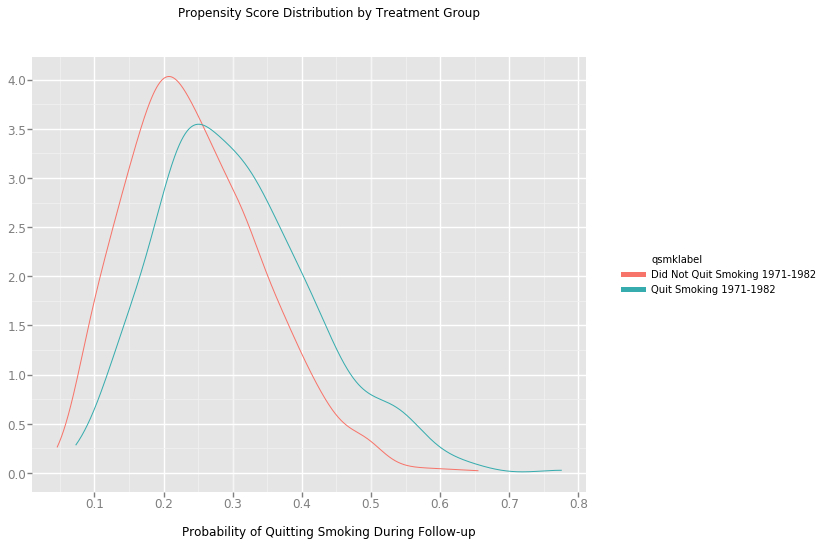

<ggplot: (-9223371854897763896)>

In [220]:
ggplot(aes(x='p_qsmk', color='qsmklabel'),data=nhefs) +\
geom_density()+\
xlab('Probability of Quitting Smoking During Follow-up') +\
ggtitle('Propensity Score Distribution by Treatment Group')


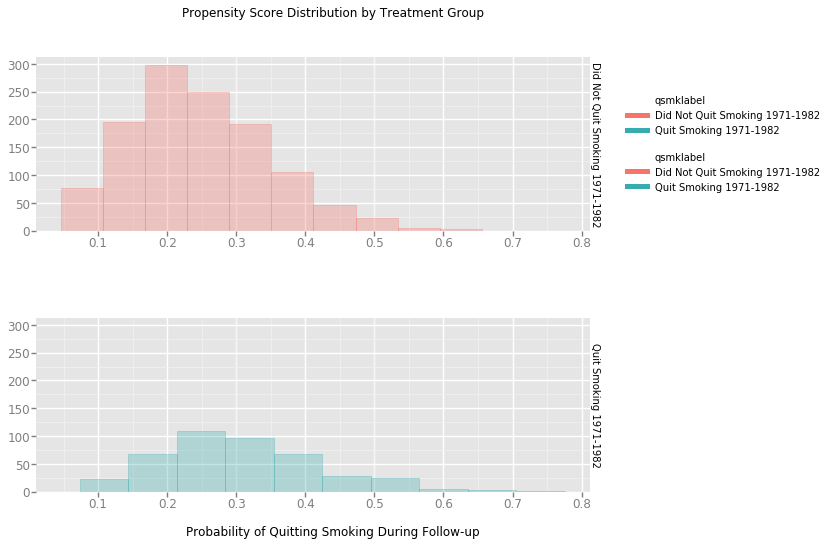

<ggplot: (-9223371854897756107)>

In [221]:
# alternative plot with histograms  
ggplot(aes(x='p_qsmk', fill ='qsmklabel' , color='qsmklabel'),data=nhefs) +\
geom_histogram(alpha = 0.3, position = 'identity') +\
facet_grid('qsmklabel') +\
xlab('Probability of Quitting Smoking During Follow-up') +\
ggtitle('Propensity Score Distribution by Treatment Group')



In [222]:
nhefs['ps_grp'] = nhefs['p_qsmk'].apply(lambda x: np.round(x/0.05)* 0.05)

In [223]:
n = pd.DataFrame(nhefs.groupby(['qsmk', 'qsmklabel', 'ps_grp'])['qsmk'].count())
n = n.add_suffix('c').reset_index()

In [224]:
n['n2'] = list(map(lambda n: n[1] if n[0]==0 else -1*n[1],\
         zip(n['qsmk'],n['qsmkc'])))

In [225]:
n['ny'] = n['qsmk'].apply(lambda x : 8 if x==0 else -8)
n['ny'] = n['n2'] + n['ny']

In [226]:
n

,qsmk,qsmklabel,ps_grp,qsmkc,n2,ny
0,0,Did Not Quit Smoking 1971-1982,0.05,10,10,18
1,0,Did Not Quit Smoking 1971-1982,0.10,103,103,111
2,0,Did Not Quit Smoking 1971-1982,0.15,187,187,195
3,0,Did Not Quit Smoking 1971-1982,0.20,254,254,262
4,0,Did Not Quit Smoking 1971-1982,0.25,216,216,224
5,0,Did Not Quit Smoking 1971-1982,0.30,174,174,182
6,0,Did Not Quit Smoking 1971-1982,0.35,116,116,124
7,0,Did Not Quit Smoking 1971-1982,0.40,75,75,83
8,0,Did Not Quit Smoking 1971-1982,0.45,28,28,36
9,0,Did Not Quit Smoking 1971-1982,0.50,22,22,30


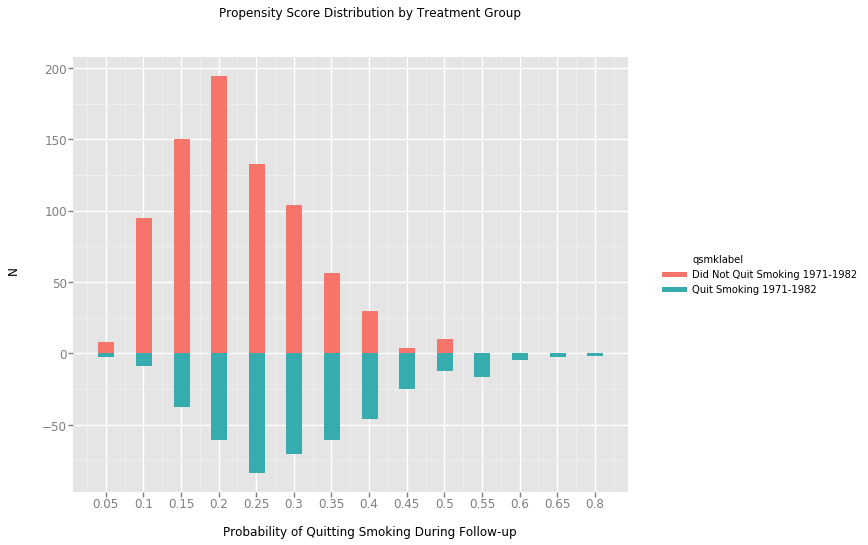

<ggplot: (181957023720)>

In [227]:
ggplot(aes(x = 'ps_grp', y = 'n2', weight = 'n2', fill = 'qsmklabel'),data=n)+\
geom_bar( position = 'stack')+\
ylab('N')+\
xlab('Probability of Quitting Smoking During Follow-up') +\
ggtitle('Propensity Score Distribution by Treatment Group')


#######################################################################################
## Program 15.3                                                                  ####
#### Stratification on the propensity score                                        ####
#### Data from NHEFS                                                               ####
#######################################################################################


In [228]:
# function to create deciles easily
def decile(x):
    return pd.qcut(x,np.arange(0, 1, 0.1), labels=False).astype('category')

In [229]:
# regression on PS deciles, not allowing for effect modification
mod2 = smf.glm(formula='wt82_71 ~ qsmk + decile(p_qsmk)', data=nhefs).fit()
mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                wt82_71   No. Observations:                 1403
Model:                            GLM   Df Residuals:                     1393
Model Family:                Gaussian   Df Model:                            9
Link Function:               identity   Scale:                   56.8754090416
Method:                          IRLS   Log-Likelihood:                -4820.4
Date:                Fri, 02 Feb 2018   Deviance:                       79227.
Time:                        03:25:13   Pearson chi2:                 7.92e+04
No. Iterations:                     2                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 3.6576      0.607      6.025      0.000       2.468       4.848
decile(p_qsmk)[T.1.0]    -0.5895      0.861     -0.685      0.493      -2.277       1.098
decile(p_qsmk)[T.2.0]    -1.0377      0.850     -1.220      0.222      -2.704       0.629
decile(p_qsmk)[T.3.0]    -0.3612      0.853     -0.424      0.672      -2.033       1.310
decile(p_qsmk)[T.4.0]    -1.0926      0.857     -1.275      0.202      -2.773       0.587
decile(p_qsmk)[T.5.0]    -1.7610      0.856     -2.057      0.040      -3.439      -0.083
decile(p_qsmk)[T.6.0]    -1.7169      0.862     -1.991      0.046      -3.407      -0.027
decile(p_qsmk)[T.7.0]    -3.0935      0.868     -3.563      0.000      -4.795      -1.392
decile(p_qsmk)[T.8.0]    -4.5711      0.871     -5.246      0.000      -6.279      -2.863
qsmk                      3.6434      0.485      7.510      0.000       2.693       4.594
=========================================================================================
"""

In [230]:
mc = mod2.conf_int()
mc.columns = ['2.5 %','97.5 %']
mc

,2.5 %,97.5 %
Intercept,2.467702,4.847565
decile(p_qsmk)[T.1.0],-2.276646,1.097649
decile(p_qsmk)[T.2.0],-2.704363,0.628928
decile(p_qsmk)[T.3.0],-2.032511,1.310012
decile(p_qsmk)[T.4.0],-2.772551,0.587403
decile(p_qsmk)[T.5.0],-3.438803,-0.083113
decile(p_qsmk)[T.6.0],-3.406622,-0.027084
decile(p_qsmk)[T.7.0],-4.795100,-1.391907
decile(p_qsmk)[T.8.0],-6.278938,-2.863189
qsmk,2.692570,4.594275


In [231]:
# regression on PS deciles, allowing for effect modification
mod5 = smf.glm(formula='wt82_71 ~ qsmk*decile(p_qsmk)', data=nhefs).fit()
mod5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                wt82_71   No. Observations:                 1403
Model:                            GLM   Df Residuals:                     1385
Model Family:                Gaussian   Df Model:                           17
Link Function:               identity   Scale:                   56.9675991586
Method:                          IRLS   Log-Likelihood:                -4817.5
Date:                Fri, 02 Feb 2018   Deviance:                       78900.
Time:                        03:25:17   Pearson chi2:                 7.89e+04
No. Iterations:                     2                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      3.8420      0.633      6.066      0.000       2.601       5.083
decile(p_qsmk)[T.1.0]         -0.5715      0.926     -0.617      0.537      -2.386       1.243
decile(p_qsmk)[T.2.0]         -1.5672      0.902     -1.737      0.082      -3.335       0.201
decile(p_qsmk)[T.3.0]         -0.5685      0.928     -0.613      0.540      -2.387       1.250
decile(p_qsmk)[T.4.0]         -1.1779      0.945     -1.247      0.212      -3.029       0.673
decile(p_qsmk)[T.5.0]         -2.1332      0.945     -2.258      0.024      -3.985      -0.282
decile(p_qsmk)[T.6.0]         -2.2702      0.956     -2.374      0.018      -4.144      -0.396
decile(p_qsmk)[T.7.0]         -2.9296      0.966     -3.032      0.002      -4.823      -1.036
decile(p_qsmk)[T.8.0]         -4.6216      0.994     -4.648      0.000      -6.570      -2.673
qsmk                           1.4453      2.187      0.661      0.509      -2.841       5.732
qsmk:decile(p_qsmk)[T.1.0]     1.0925      2.697      0.405      0.685      -4.193       6.378
qsmk:decile(p_qsmk)[T.2.0]     4.7078      2.790      1.687      0.092      -0.761      10.177
qsmk:decile(p_qsmk)[T.3.0]     2.2997      2.612      0.880      0.379      -2.821       7.420
qsmk:decile(p_qsmk)[T.4.0]     1.8257      2.575      0.709      0.478      -3.221       6.873
qsmk:decile(p_qsmk)[T.5.0]     2.8927      2.569      1.126      0.260      -2.142       7.928
qsmk:decile(p_qsmk)[T.6.0]     3.4982      2.567      1.363      0.173      -1.534       8.530
qsmk:decile(p_qsmk)[T.7.0]     1.0028      2.571      0.390      0.696      -4.036       6.042
qsmk:decile(p_qsmk)[T.8.0]     1.8284      2.531      0.722      0.470      -3.132       6.789
==============================================================================================
"""

In [233]:
#del K5

In [234]:
l = list(map(lambda x: str('Effect of Quitting Smoking in PS Decile ')+\
             str(x), range(1,11)))
K5 = makeContrastMatrix(mod5, len(l),l)

In [235]:
for i in range(0,10):
    K5.loc['qsmk'][i] = 1

In [236]:
for j, i in zip(list(map(lambda x: \
                         str('qsmk:decile(p_qsmk)[T.')+str(x)+str('.0]')\
         , range(1,9))),range(0,8)):
    
    #print(str(j)+' '+str(i))
    K5.loc[j][i] = 1

In [237]:
H5 = K5.values.T
H5.shape

(10, 18)

In [238]:
# estimate contrasts and view tests and CIs
mod5.t_test(H5).summary()

,coef,std err,z,P>|z|,[0.025,0.975]
c0,2.5378,1.578,1.608,0.108,-0.555,5.631
c1,6.1531,1.733,3.551,0.000,2.757,9.549
c2,3.7449,1.429,2.621,0.009,0.944,6.546
c3,3.2709,1.359,2.406,0.016,0.607,5.935
c4,4.3380,1.348,3.219,0.001,1.697,6.979
c5,4.9434,1.345,3.677,0.000,2.308,7.579
c6,2.4481,1.352,1.811,0.070,-0.201,5.097
c7,3.2736,1.274,2.570,0.010,0.777,5.771
c8,1.4453,2.187,0.661,0.509,-2.841,5.732
c9,1.4453,2.187,0.661,0.509,-2.841,5.732


#######################################################################################
## Program 15.4                                                                  ####
#### Standardization using the propensity score                                    ####
#### Data from NHEFS                                                               ####
#######################################################################################


In [239]:
# regression on the propensity score (linear term)
mod6 = smf.glm(formula='wt82_71 ~ qsmk + p_qsmk', data=nhefs).fit()
mod6.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                wt82_71   No. Observations:                 1555
Model:                            GLM   Df Residuals:                     1552
Model Family:                Gaussian   Df Model:                            2
Link Function:               identity   Scale:                   58.0259862174
Method:                          IRLS   Log-Likelihood:                -5362.3
Date:                Fri, 02 Feb 2018   Deviance:                       90056.
Time:                        03:25:39   Pearson chi2:                 9.01e+04
No. Iterations:                     2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8206      0.515     11.297      0.000       4.811       6.830
qsmk           3.5819      0.456      7.862      0.000       2.689       4.475
p_qsmk       -15.6273      1.886     -8.286      0.000     -19.324     -11.931
==============================================================================
"""

In [318]:
# standarization on the propensity score
# (step 1) create two new datasets, one with all treated and one with all untreated
treated = nhefs.copy()
treated['qsmk'] = 1

untreated = nhefs.copy()
untreated['qsmk'] = 0

In [319]:
# (step 2) predict values for everyone in each new dataset based on above model
treated['pred_y'] = mod6.predict(treated)
untreated['pred_y'] =  mod6.predict(untreated)

In [320]:
# (step 3) compare mean weight loss had all been treated vs. that had all been untreated
mean1 = np.nanmean(treated['pred_y'])
mean0 = np.nanmean(untreated['pred_y'])
print('mean of treated: '+ str(mean1))
print('mean of untreated: '+str(mean0))
print('diff of means: '+str(mean1 - mean0))

mean of treated: 5.30476813384
mean of untreated: 1.72287755794
diff of means: 3.5818905759


In [321]:
sampl_treated = nhefs.copy()
sampl_treated['qsmk'] = 1

sampl_untreated = nhefs.copy()
sampl_untreated['qsmk'] = 0

In [323]:
tdf_resampled = sampl_treated.\
loc[bootstrap_resample(sampl_treated.index,100)].copy()
mod3 = smf.glm(formula='wt82_71 ~ qsmk + p_qsmk', data=tdf_resampled).fit()
tdf_resampled['pred_y'] = mod3.predict(tdf_resampled)

In [324]:
mean1 = np.nanmean(tdf_resampled['pred_y'])
print('mean of treated: '+ str(mean1))

mean of treated: 4.26298207718


In [325]:
utdf_resampled = sampl_untreated.\
loc[bootstrap_resample(sampl_untreated.index,100)].copy()
mod3 = smf.glm(formula='wt82_71 ~ qsmk + p_qsmk', data=utdf_resampled).fit()
utdf_resampled['pred_y'] = mod3.predict(utdf_resampled)

In [326]:
mean0 = np.nanmean(utdf_resampled['pred_y'])
print('mean of treated: '+ str(mean0))

mean of treated: 2.15447522022


In [327]:
diff = mean1 - mean0
print('diff of means: '+str(diff))

diff of means: 2.10850685696


In [ ]:
# add commit 